# **Data Visualization Course Project**
# Theme - **Environment**



--- By Shivam Kumar Singh

--- 210150022





# Temperature
Let's talk about how Temperatures varied across India, over the months of Year 2019

### First discuss the distribution of Maximum & Minimum Temperature, combined for all the stations to get a overview

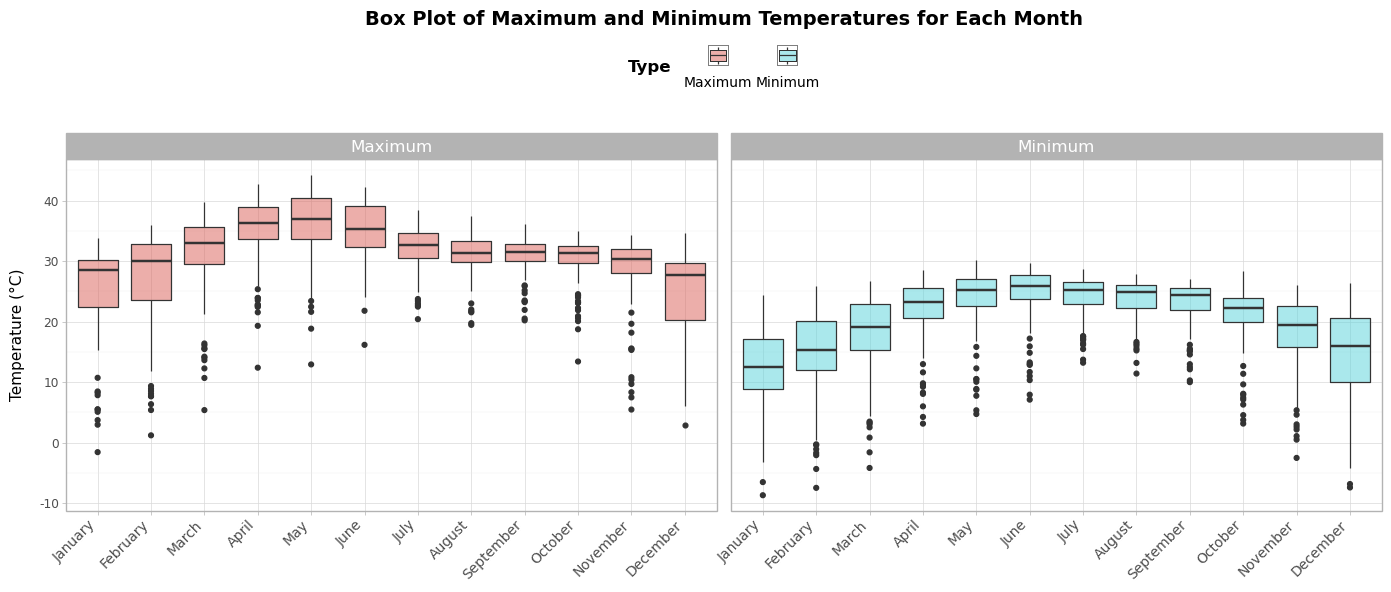

In [1]:
# @title ### Boxplot showing the Monthly maximum & mininmum Temperature for about 127 stations across India

import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, labs, scale_x_discrete, theme_light, facet_wrap, theme, element_text
import calendar

# Load datasets
max_temp_df = pd.read_csv("final_max_temp.csv")
min_temp_df = pd.read_csv("final_min_temp.csv")

# Remove non-temperature columns
max_temp_data = max_temp_df.drop(columns=["Station Name", "State", "District"])
min_temp_data = min_temp_df.drop(columns=["Station Name", "State", "District"])

# Melt the dataframes
max_temp_data_melted = max_temp_data.melt(var_name='Month', value_name='Temperature')
min_temp_data_melted = min_temp_data.melt(var_name='Month', value_name='Temperature')

# Add a new column to identify the type of temperature
max_temp_data_melted['Type'] = 'Maximum'
min_temp_data_melted['Type'] = 'Minimum'

# Concatenate the melted dataframes
combined_data = pd.concat([max_temp_data_melted, min_temp_data_melted], ignore_index=True)

# Get full month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot combined box plots using facet_wrap
plot_combined = (
    ggplot(combined_data, aes(x='Month', y='Temperature', fill='Type')) +
    geom_boxplot(alpha=0.5) +
    labs(title='Box Plot of Maximum and Minimum Temperatures for Each Month', x='', y='Temperature (°C)') +
    scale_x_discrete(labels=[f'{month_names[i-1]}' for i in range(1, 13)]) +  # Using full month names
    facet_wrap('~Type', ncol=2) +  # Plot side by side
    theme_light() +  # Set light background
    theme(
        figure_size=(14, 6),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12),  # Adjust facet labels
        plot_title=element_text(size=14, face='bold', hjust=0.5)  # Adjust title size, bold, and centering
    )
)

# Display the combined plot
plot_combined.draw()

#### Observations ▶

* Temperature varies from about -8°C to 44°C while the mean varies from about 12°C to 37°C.

* Mean maximum Temperature peaked during the month of May while Minimum Temperature peaked during the month of June.

* Mean maximum Temperature was the lowest in December while the Minimum Temperature was lowest in January.

* Outliers exist but these outliers are observed in the lower temperatures scale.



### Now let's discuss how the Temperature varied across the states for every month

In [2]:
# @title ### Heatmap of Statewise average of monthly max & min Temperature(over all the stations of a state) across the months of 2019
import pandas as pd
import calendar
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, labs, theme_minimal, theme, element_text, guide_colorbar

# Load datasets
max_temp_df = pd.read_csv("final_max_temp.csv")
min_temp_df = pd.read_csv("final_min_temp.csv")

# Drop unnecessary columns
max_temp_df = max_temp_df.drop(['Station Name', 'District'], axis=1)
min_temp_df = min_temp_df.drop(['Station Name', 'District'], axis=1)

# Convert temperature columns to numeric, coercing non-numeric values to NaN
max_temp_df.iloc[:, 1:] = max_temp_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
min_temp_df.iloc[:, 1:] = min_temp_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Step 1: Calculate average temperature for each state and month for both max and min temperatures
max_temp_avg = max_temp_df.groupby(['State']).mean()
min_temp_avg = min_temp_df.groupby(['State']).mean()

# Get full month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Rename columns with full month names
max_temp_avg.columns = month_names
min_temp_avg.columns = month_names

# Reshape the DataFrames so that months become a separate categorical variable
max_temp_avg_melted = max_temp_avg.reset_index().melt(id_vars=['State'], var_name='Month', value_name='Average Maximum Temperature')
min_temp_avg_melted = min_temp_avg.reset_index().melt(id_vars=['State'], var_name='Month', value_name='Average Minimum Temperature')

# Convert 'Month' variable to categorical with custom sort order
max_temp_avg_melted['Month'] = pd.Categorical(max_temp_avg_melted['Month'], categories=month_names, ordered=True)
min_temp_avg_melted['Month'] = pd.Categorical(min_temp_avg_melted['Month'], categories=month_names, ordered=True)

# Plotting heatmap for max_temp_avg_melted DataFrame with improved aesthetics and colorbar at the top
plot_max_temp_heatmap = (
    ggplot(max_temp_avg_melted, aes(x='State', y='Month', fill='Average Maximum Temperature')) +
    geom_tile(color="black") +  # Add black borders to each tile
    scale_fill_gradient(low="#46D5FF", high="#FF3E00", guide=guide_colorbar(position='top')) +  # Color scale with colorbar at the top
    labs(title="Average Maximum Temperature Across States and Months",
         x="State",
         y="Month",
         fill="Average Maximum Temperature (°C)") +
    theme_minimal() +
    theme_light() +
    theme(
        figure_size=(15, 8),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        axis_title=element_text(size=12, face='bold'),  # Adjust axis titles
        legend_position='right',  # Move legend to the right
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)

# Plotting heatmap for min_temp_avg_melted DataFrame with improved aesthetics and colorbar at the top
plot_min_temp_heatmap = (
    ggplot(min_temp_avg_melted, aes(x='State', y='Month', fill='Average Minimum Temperature')) +
    geom_tile(color="black") +  # Add black borders to each tile
    scale_fill_gradient(low="#46D5FF", high="#FF3E00", guide=guide_colorbar(position='top')) +  # Color scale with colorbar at the top
    labs(title="Average Minimum Temperature Across States and Months",
         x="State",
         y="Month",
         fill="Average Minimum Temperature (°C)") +
    theme_minimal() +
    theme_light() +
    theme(
        figure_size=(15, 8),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        axis_title=element_text(size=12, face='bold'),  # Adjust axis titles
        legend_position='right',  # Move legend to the right
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)


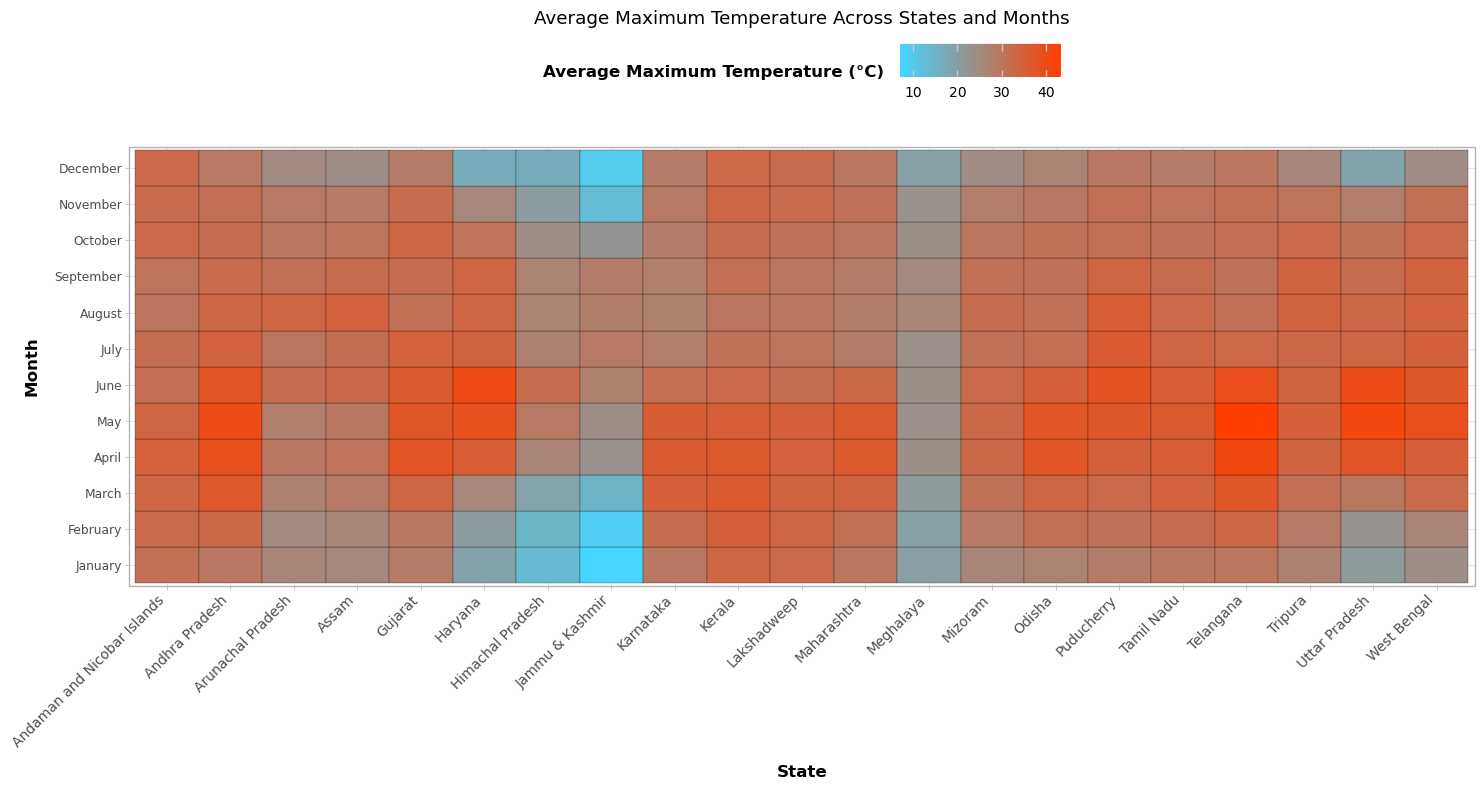

In [3]:
plot_max_temp_heatmap.draw()

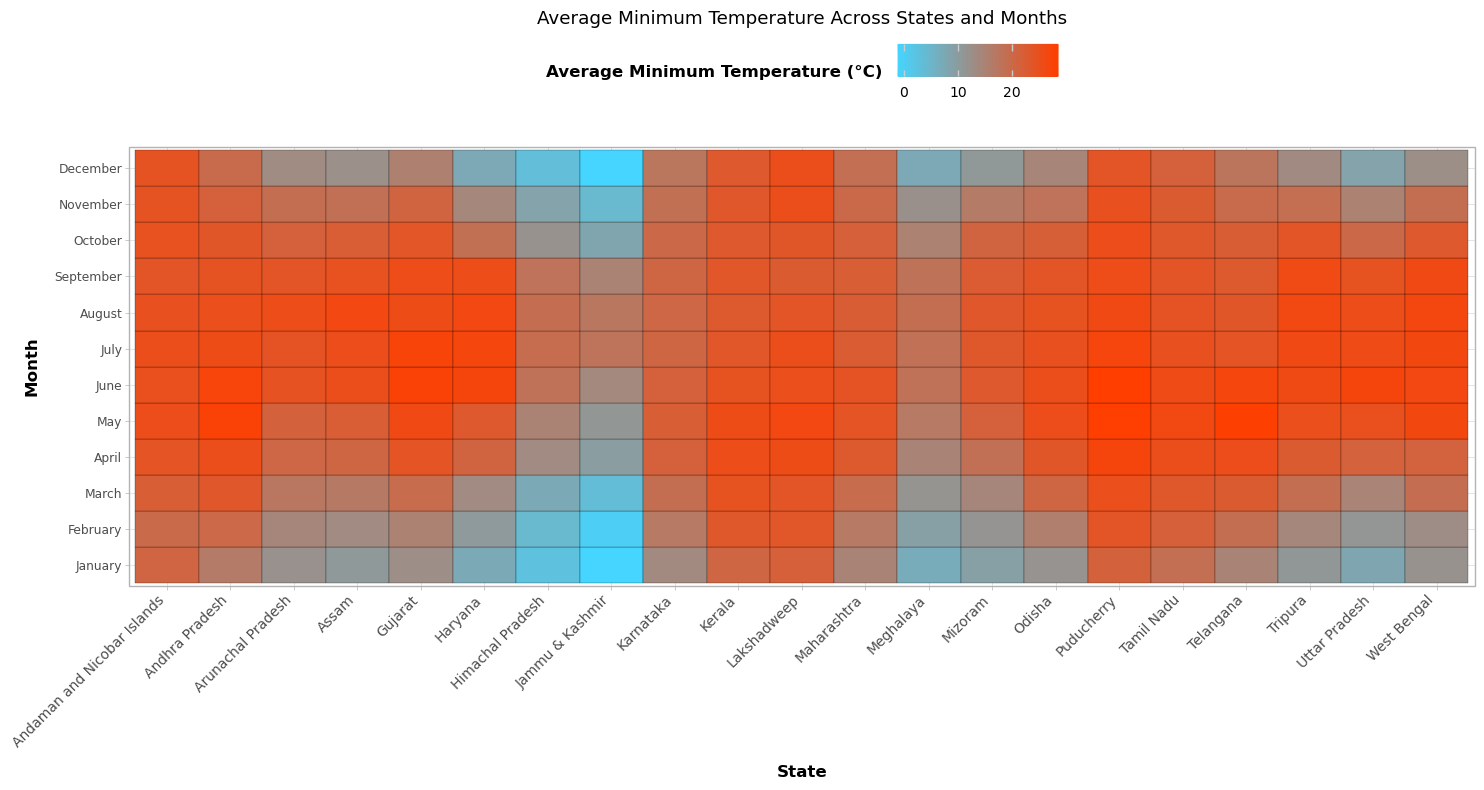

In [4]:
plot_min_temp_heatmap.draw()

#### Observation ▶

* States/UTs like Kerala, Tamil Nadu, Lakshadweep, Puducherry & Andaman Nicobar seem to have less variation in Temperature across the year as these states/UTs are located in coastal regions in hotter range while Meghalaya has similar climate but in cooler range, maybe because of cloudy climate.

* Maximum average temperature was observed in Telangana in the month of May and Haryana in June while Jammu & Kashmir was the coolest state.

* States like Jammu & Kashmir, Gujarat, Haryana, Andhra Pradesh, Uttar Pradesh & Telangana have higher variation in Temperature across the year.


### It's time to analyse extreme Temperatures

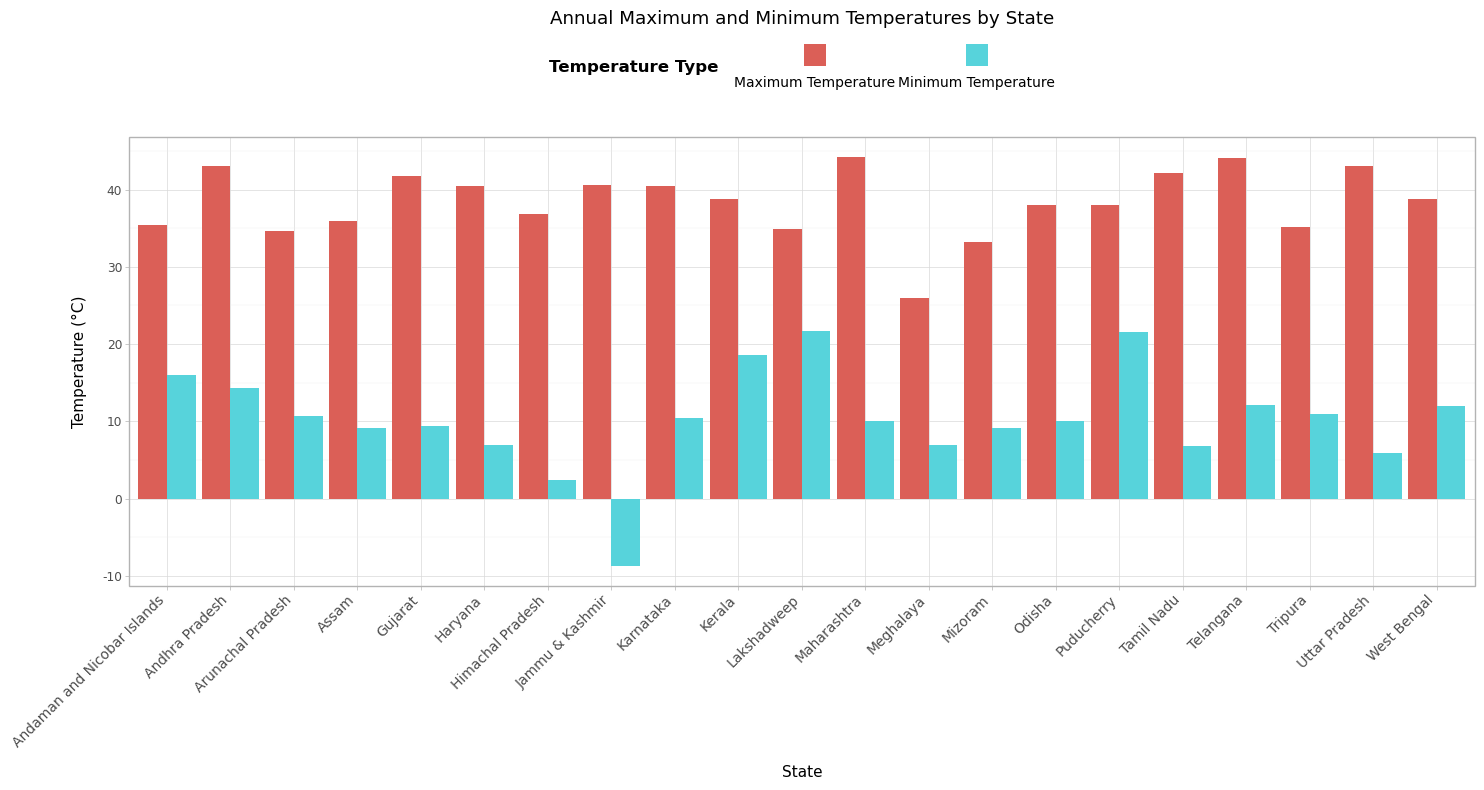

In [5]:
# @title ### Statewise annual Maximum and Minimum Temperatures
import pandas as pd
from plotnine import ggplot, aes, geom_col, labs, theme_minimal, theme, element_text

# Load datasets
max_temp_df = pd.read_csv("final_max_temp.csv")
min_temp_df = pd.read_csv("final_min_temp.csv")

# Convert temperature columns to numeric
max_temp_df.iloc[:, 3:] = max_temp_df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')
min_temp_df.iloc[:, 3:] = min_temp_df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

# Step 1: Calculate maximum & minimum temperature for each station across the year
max_temp_df['Maximum Temperature'] = max_temp_df.iloc[:, 3:].max(axis=1)
min_temp_df['Minimum Temperature'] = min_temp_df.iloc[:, 3:].min(axis=1)

# Step 2: Group by state and find maximum temperature across all stations of each state
max_temp_state = max_temp_df.groupby("State")["Maximum Temperature"].max()

# Step 3: Group by state and find minimum temperature across all stations of each state
min_temp_state = min_temp_df.groupby("State")["Minimum Temperature"].min()

# Step 4: Create a dataframe for plotting
plot_df = pd.DataFrame({'State': max_temp_state.index,
                        'Maximum Temperature': max_temp_state.values,
                        'Minimum Temperature': min_temp_state.values})

# Step 5: Melt the dataframe to long format for plotting
plot_df_melted = pd.melt(plot_df, id_vars=['State'], var_name='Temperature Type', value_name='Temperature')

# Step 6: Plot bar plot
plot = (
    ggplot(plot_df_melted, aes(x='State', y='Temperature', fill='Temperature Type')) +
    geom_col(position='dodge') +
    labs(title='Annual Maximum and Minimum Temperatures by State',
         x='State',
         y='Temperature (°C)',
         fill='Temperature Type') +
    theme_light() +
    theme(
        figure_size=(15, 8),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)

# Step 7: Display the plot
plot.draw()


#### Observations ▶
* Maharashtra saw the highest temperature over the year, followed by Telangana, Andhra Pradesh, Uttar Pradesh & Tamil Nadu.

* Jammu & Kashmir saw the lowest temperature over the year, followed by Himachal Pradesh, Uttar Pradesh, Tamil Nadu & Meghalaya.

* Jammu & Kashmir had a high range in temperatures observed during the year (from -8°C to 41°C). Further analysis of Temperature differences is difficult.

#### Requirement of a sorted barplot to analyse the order of temperature difference among the states.

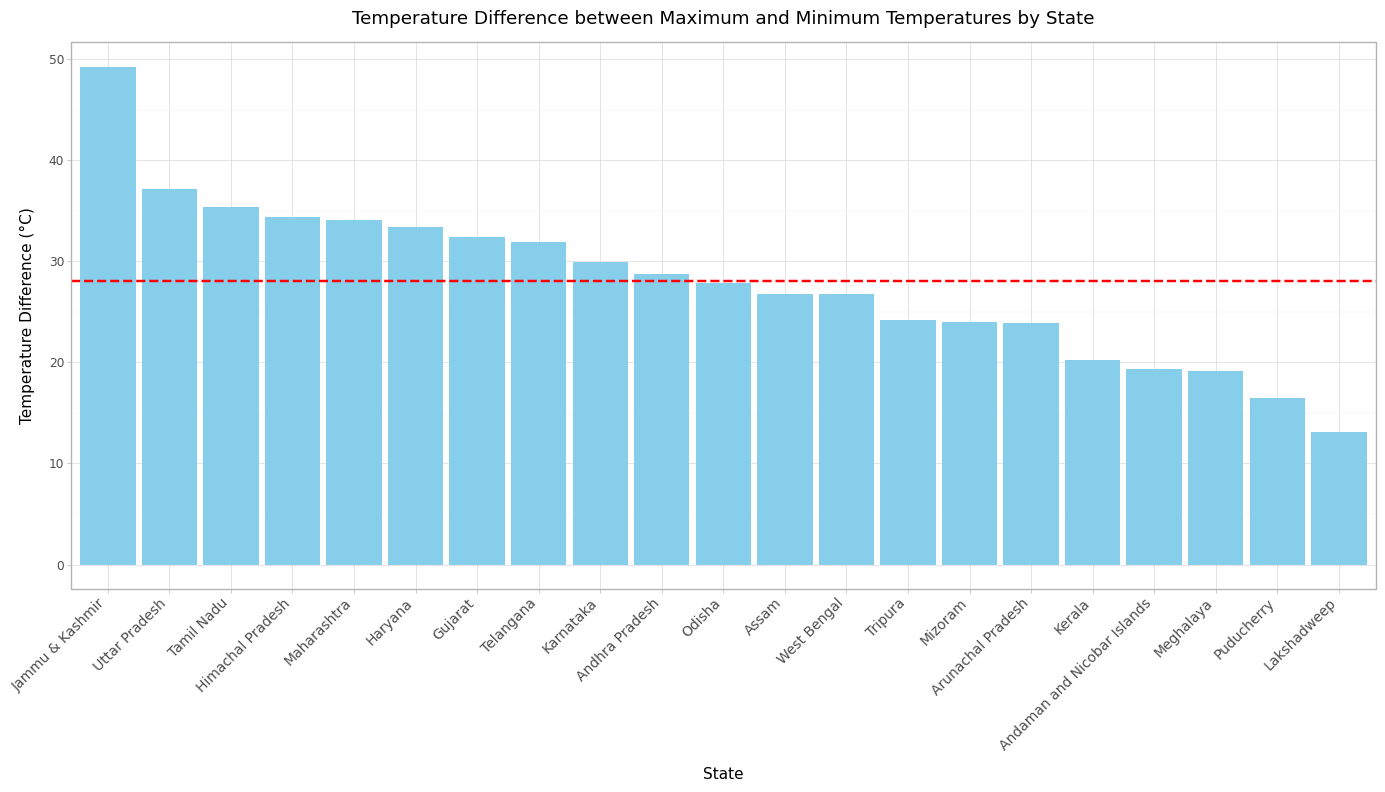

In [6]:
# @title ### Sorted bar plot for the difference between maximum and minimum temperature
import pandas as pd
from plotnine import ggplot, aes, geom_col, labs, theme_light, theme, element_text, geom_hline

# Load datasets
max_temp_df = pd.read_csv("final_max_temp.csv")
min_temp_df = pd.read_csv("final_min_temp.csv")

# Convert temperature columns to numeric
max_temp_df.iloc[:, 3:] = max_temp_df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')
min_temp_df.iloc[:, 3:] = min_temp_df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

# Step 1: Calculate maximum & minimum temperature for each station across the year
max_temp_df['Maximum Temperature'] = max_temp_df.iloc[:, 3:].max(axis=1)
min_temp_df['Minimum Temperature'] = min_temp_df.iloc[:, 3:].min(axis=1)

# Step 2: Group by state and find maximum temperature across all stations of each state
max_temp_state = max_temp_df.groupby("State")["Maximum Temperature"].max()

# Step 3: Group by state and find minimum temperature across all stations of each state
min_temp_state = min_temp_df.groupby("State")["Minimum Temperature"].min()

# Step 4: Create a dataframe for plotting
merged_df = pd.DataFrame({'State': max_temp_state.index,
                          'Maximum Temperature': max_temp_state.values,
                          'Minimum Temperature': min_temp_state.values})

# Step 5: Calculate temperature difference
merged_df['Temperature Difference'] = merged_df['Maximum Temperature'] - merged_df['Minimum Temperature']

# Step 6: Sort dataframe by temperature difference
sorted_df = merged_df.sort_values(by='Temperature Difference', ascending=False)

# Convert 'State' column to categorical with sorted order
sorted_df['State'] = pd.Categorical(sorted_df['State'], categories=sorted_df['State'].unique(), ordered=True)

# Calculate average temperature difference
average_difference = sorted_df['Temperature Difference'].mean()

# Step 7: Plot sorted bar plot
plot = (
    ggplot(sorted_df, aes(x='State', y='Temperature Difference')) +
    geom_col(fill='skyblue') +
    geom_hline(yintercept=average_difference, linetype="dashed", color="red", size=1) +  # Add horizontal line for average difference
    labs(title='Temperature Difference between Maximum and Minimum Temperatures by State',
         x='State',
         y='Temperature Difference (°C)') +
    theme_light() +
    theme(
        axis_text_x=element_text(size=10, angle=45, hjust=1),
        figure_size=(14, 8),
        legend_position='none'
    )
)

# Step 8: Display the plot
plot.draw()


#### Observations ▶

* Among the Top 7 states having high difference between maximum & minimum Temperature, 6 states are landlocked except Tamil Nadu(it could be that some stations in Tamil Nadu observed extreme temperatures due to various factors) while Tamil Nadu had lower variation in average temperature over the year as observed in heatmap earlier.

* Among the Top 5 states having low difference between maximum & minimum Temperature, 4 states belong to coastal regions except Meghalaya (this might be because of cloudy climate), similar observations could be seen in heatmap.

* Average extreme difference across all the states lies somewhere around 28°C which matches with that of Odisha.


### Visualization on Indian Map

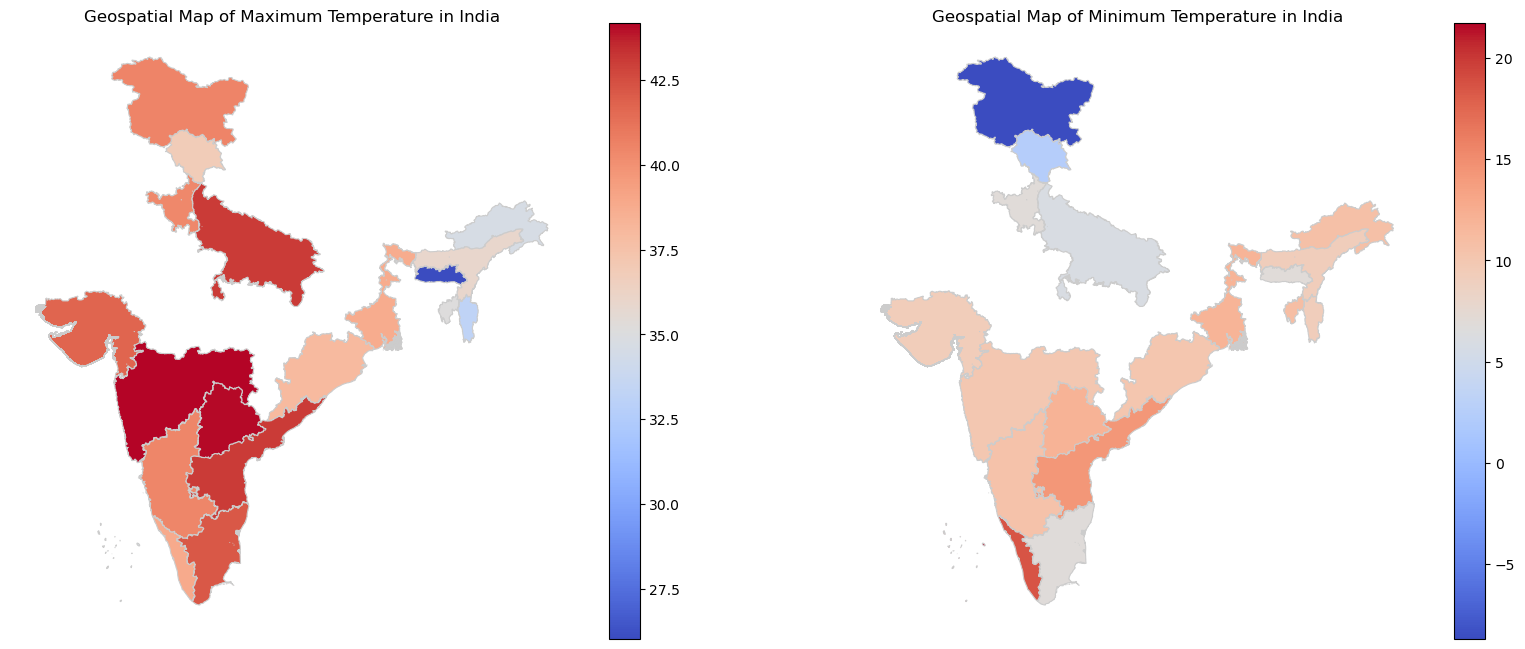

In [7]:
# @title Geospatial map of annual maximum and minimum temperature in India
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of Indian states
india_states = gpd.read_file("Indian_States.shp")
india_states['st_nm'] = india_states['st_nm'].replace('Arunanchal Pradesh', 'Arunachal Pradesh')
india_states['st_nm'] = india_states['st_nm'].replace('NCT of Delhi', 'Delhi')
# Load datasets
max_temp_df = pd.read_csv("final_max_temp.csv")
min_temp_df = pd.read_csv("final_min_temp.csv")

# Step 1: Calculate maximum & minimum temperature for each station across the year
max_temp_df['Maximum Temperature'] = max_temp_df.iloc[:, 3:].max(axis=1)
min_temp_df['Minimum Temperature'] = min_temp_df.iloc[:, 3:].min(axis=1)

# Step 2: Group by state and find maximum temperature across all stations of each state
max_temp_state = max_temp_df.groupby("State")["Maximum Temperature"].max()

# Step 3: Group by state and find minimum temperature across all stations of each state
min_temp_state = min_temp_df.groupby("State")["Minimum Temperature"].min()

# Merge temperature data with shapefile
max_temp_merged = india_states.merge(max_temp_state, how='left', left_on='st_nm', right_on='State')
min_temp_merged = india_states.merge(min_temp_state, how='left', left_on='st_nm', right_on='State')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot geospatial map for maximum temperature
max_temp_merged.plot(column='Maximum Temperature', cmap='coolwarm', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('Geospatial Map of Maximum Temperature in India')
ax1.axis('off')

# Plot geospatial map for minimum temperature
min_temp_merged.plot(column='Minimum Temperature', cmap='coolwarm', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('Geospatial Map of Minimum Temperature in India')
ax2.axis('off')

plt.show()

#### Observations ▶

* Lack of sufficient data for some states (which are not visible in the plot).

* In general, Northern states are cooler than Southern states due to equatorial distance.

* One can be confused from the 1st plot that Meghalaya & Mizoram has lower temperature value than the coolest state Jammu & Kashmir the plot depicts least Maximum temperature, not the least Temperature (can be confirmed by the 2nd plot).


### Analysis of the distribution of frequency of Stations over annual maximum & minimum Temperature

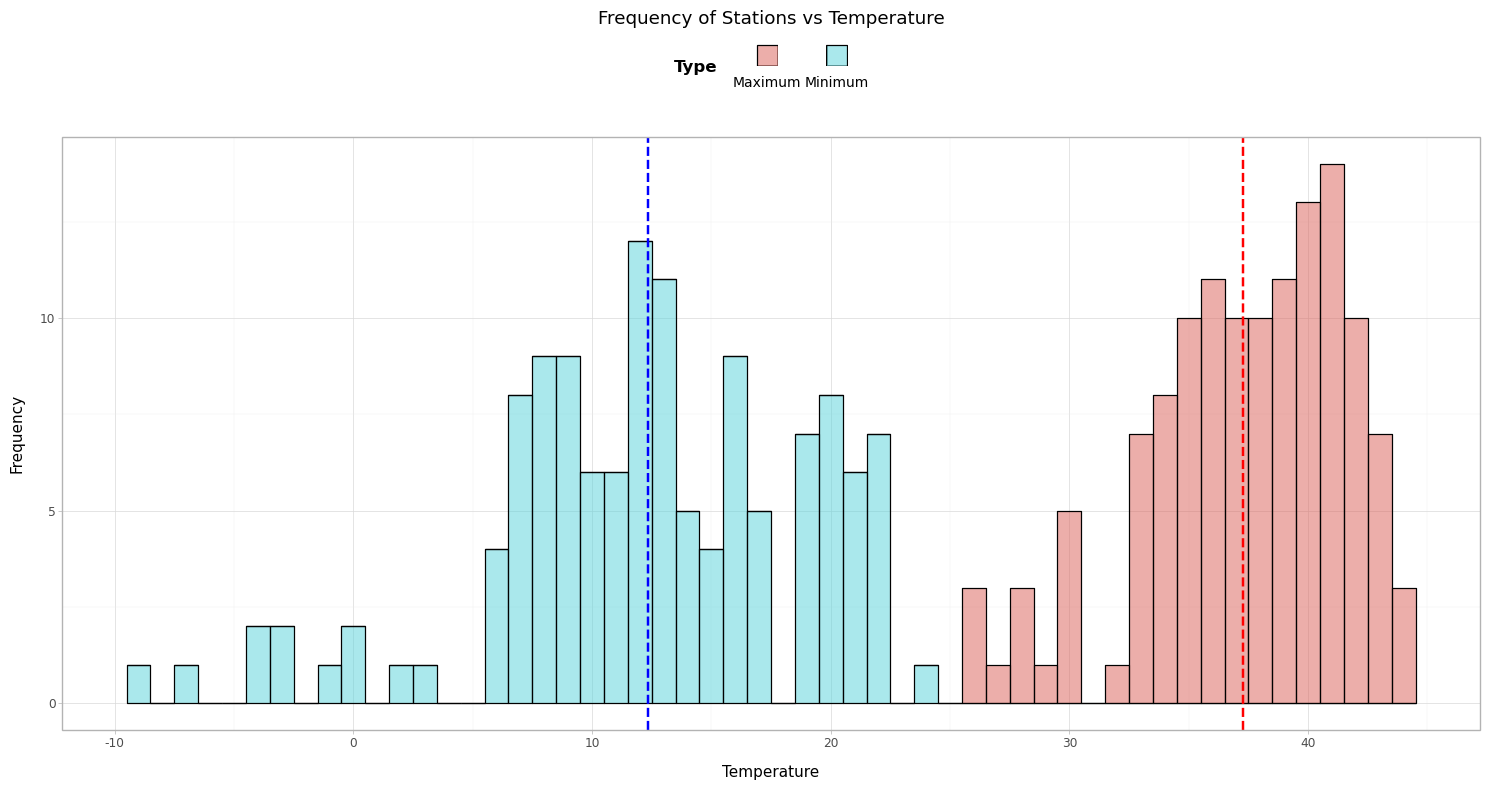

In [8]:
# @title ### Histogram of frequency of Stations vs annual maximum & minimum temperature
import pandas as pd
from plotnine import ggplot, aes, geom_histogram, facet_wrap, geom_vline, labs, theme_minimal, theme, element_text

# Load datasets
max_temp_df = pd.read_csv("final_max_temp.csv")
min_temp_df = pd.read_csv("final_min_temp.csv")

# Convert temperature columns to numeric
max_temp_df.iloc[:, 3:] = max_temp_df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')
min_temp_df.iloc[:, 3:] = min_temp_df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

# Step 1: Calculate maximum & minimum temperature for each station across the year
max_temp_df['Maximum Temperature'] = max_temp_df.iloc[:, 3:].max(axis=1)
min_temp_df['Minimum Temperature'] = min_temp_df.iloc[:, 3:].min(axis=1)

# Combine DataFrames and Melt
combined_df = pd.concat([
    max_temp_df[['Station Name', 'State', 'District', 'Maximum Temperature']].rename(columns={'Maximum Temperature': 'Temperature'}),
    min_temp_df[['Station Name', 'State', 'District', 'Minimum Temperature']].rename(columns={'Minimum Temperature': 'Temperature'})
], ignore_index=True)

# Add a new column to identify the type of temperature
combined_df['Type'] = ['Maximum'] * len(max_temp_df) + ['Minimum'] * len(min_temp_df)

# Calculate mean maximum and minimum temperatures
mean_max_temp = max_temp_df['Maximum Temperature'].values.flatten().mean()
mean_min_temp = min_temp_df['Minimum Temperature'].values.flatten().mean()

# Plotting with facet_wrap
plot_combined = (
    ggplot(combined_df, aes(x='Temperature', fill='Type')) +
    geom_histogram(binwidth=1, color="black", alpha=0.5) +
    geom_vline(xintercept=mean_max_temp, color="red", linetype="dashed", size=1) +  # Vertical line for mean maximum temperature
    geom_vline(xintercept=mean_min_temp, color="blue", linetype="dashed", size=1) +  # Vertical line for mean minimum temperature
    labs(title="Frequency of Stations vs Temperature",
         x="Temperature",
         y="Frequency") +
    # facet_wrap('~Type', nrow=1) +  # Plot side by side
    theme_minimal() +
    theme_light() +
    theme(
        figure_size=(15, 8),  # Enlarge figure size
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)

# Display the combined plot
plot_combined.draw()


#### Observations ▶

* Mean minimum temperature over all stations is around 12°C while that of the maximum temperature is around 38°C.

* Minimum temperature has higher variance in comparision to maximum temperature.

### How Maximum & Minimum Temperatures are correlated with each other ?

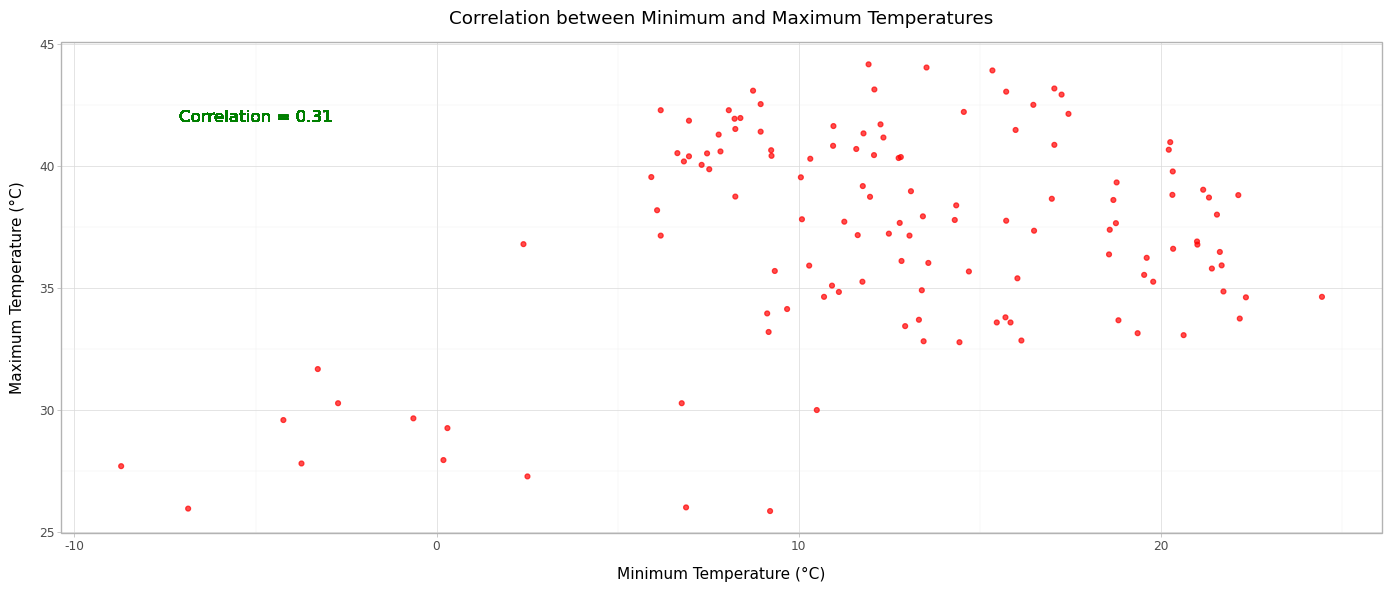

In [9]:
# @title ### Scatter Plot between Maximum & Minimum Temperature
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_minimal, theme, element_text, geom_text

# Load datasets
max_temp_df = pd.read_csv("final_max_temp.csv")
min_temp_df = pd.read_csv("final_min_temp.csv")

# Convert temperature columns to numeric
max_temp_df.iloc[:, 3:] = max_temp_df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')
min_temp_df.iloc[:, 3:] = min_temp_df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

# Step 1: Calculate maximum & minimum temperature for each station across the year
max_temp_df['Maximum Temperature'] = max_temp_df.iloc[:, 3:].max(axis=1)
min_temp_df['Minimum Temperature'] = min_temp_df.iloc[:, 3:].min(axis=1)

# Merge DataFrames
merged_df = pd.merge(max_temp_df[['Station Name', 'State', 'District','Maximum Temperature']],
                     min_temp_df[['Station Name', 'State', 'District','Minimum Temperature']],
                     on=['Station Name', 'State', 'District'])

# Calculate correlation coefficient
correlation_coefficient = merged_df['Maximum Temperature'].corr(merged_df['Minimum Temperature'])

# Plotting scatter plot
plot_scatter = (
    ggplot(merged_df, aes(x='Minimum Temperature', y='Maximum Temperature')) +
    geom_point(alpha=0.7, color="red") +
    geom_text(x=-5, y=42, label=f"Correlation = {correlation_coefficient:.2f}", color="green", size=12) +  # Annotation for correlation coefficient
    labs(title="Correlation between Minimum and Maximum Temperatures",
         x="Minimum Temperature (°C)",
         y="Maximum Temperature (°C)") +
    theme_minimal() +
    theme_light() +
    theme(
        figure_size=(14, 6),  # Enlarge figure size
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)

# Display the scatter plot
plot_scatter.draw()


#### Observations ▶

* Minimum & Maximum Temperature are slightly positively correlated with a value of 0.31.

# Rainfall
Let's now talk about how Rainfall varied across India, over the months of Year 2019

### First we discuss the distribution of Rainfall, combined for all the stations to get an overview

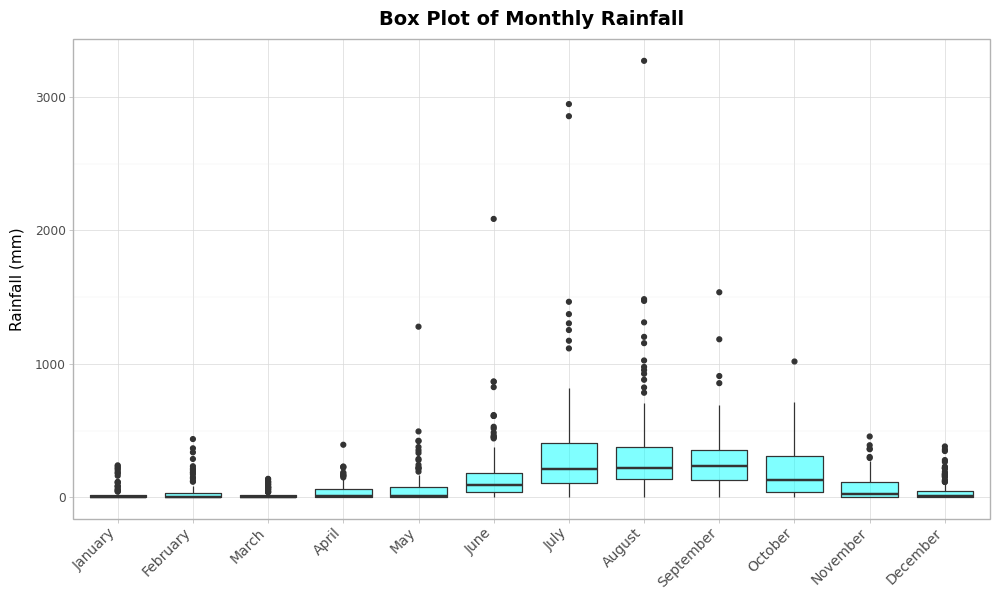

In [11]:
# @title Boxplot showing the monthly Rainfall for about 127 stations across India
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, labs, scale_x_discrete, theme_light, facet_wrap, theme, element_text
import calendar

# Load dataset
rainfall_df = pd.read_csv("final_rain.csv")

# Remove non-rainfall columns
rainfall_data = rainfall_df.drop(columns=["Station Name", "State", "District"])

# Melt the dataframe
rainfall_data_melted = rainfall_data.melt(var_name='Month', value_name='Rainfall')


# Get full month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Plot box plot for rainfall
plot_rainfall = (
    ggplot(rainfall_data_melted, aes(x='Month', y='Rainfall')) +
    geom_boxplot(alpha=0.5, fill = '#02FFFF') +
    labs(title='Box Plot of Monthly Rainfall', x='', y='Rainfall (mm)') +
    scale_x_discrete(labels=[f'{month_names[i-1]}' for i in range(1, 13)]) +  # Using full month names
    theme_light() +  # Set light background
    theme(
        figure_size=(10, 6),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12),  # Adjust facet labels
        plot_title=element_text(size=14, face='bold', hjust=0.5)  # Adjust title size, bold, and centering
    )
)

# Display the plot for rainfall
plot_rainfall.draw()

#### Observations ▶

* Maximum rainfall received by any station is about 3600 mm.

* Rainfall peaked in the months of July and August while minimum rainfall occurred during the month of March.

* Outliers in the higher rainfall scale can be observed.

### Analysis of statewise distribution of Rainfall

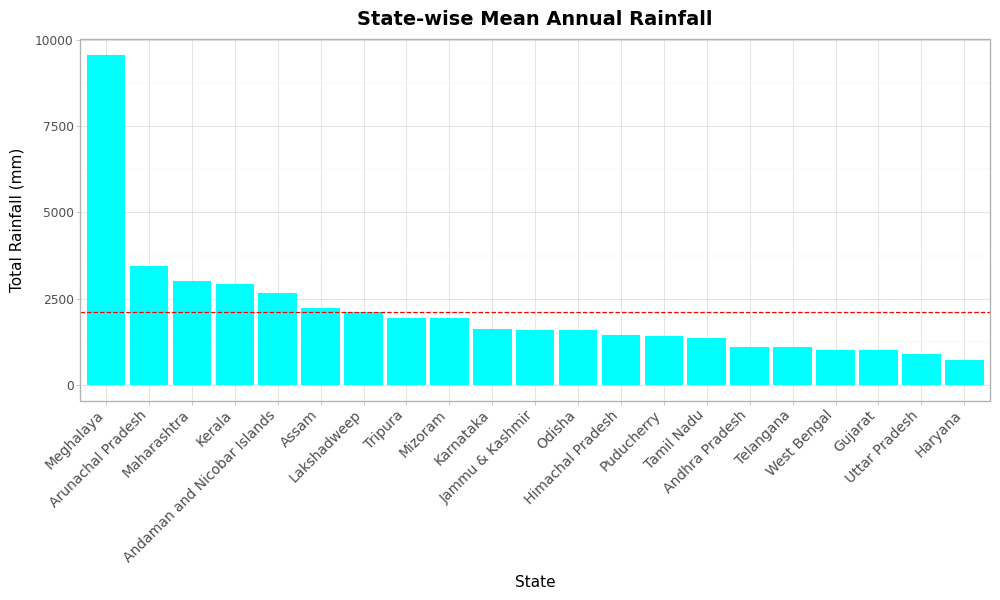

In [12]:
# Import necessary libraries
from plotnine import *
import pandas as pd

# Load the dataset
df = pd.read_csv("final_rain.csv")

# Sum over all the months and stations for each state
df['Total_Rainfall_All_Months_All_Stations'] = df.iloc[:, 3:].sum(axis=1)

# Group by state and sum over all stations
statewise_mean_rainfall = df.groupby('State')['Total_Rainfall_All_Months_All_Stations'].mean().reset_index()

# Sort the dataframe by Total_Rainfall_All_Months_All_Stations in descending order
statewise_mean_rainfall = statewise_mean_rainfall.sort_values(by='Total_Rainfall_All_Months_All_Stations', ascending=False)

# Convert State column to categorical to avoid auto-sorting
statewise_mean_rainfall['State'] = pd.Categorical(statewise_mean_rainfall['State'], categories=statewise_mean_rainfall['State'])

# Calculate the average rainfall
average_rainfall = statewise_mean_rainfall['Total_Rainfall_All_Months_All_Stations'].mean()

# Create a bar chart using plotnine
bar_chart = (
    ggplot(statewise_mean_rainfall, aes(x='State', y='Total_Rainfall_All_Months_All_Stations')) +
    geom_bar(stat='identity', fill='#02FFFF') +
    geom_hline(yintercept=average_rainfall, linetype="dashed", color="red") +  # Add horizontal line for average rainfall
    theme_minimal() +
    theme_light() +
    labs(
        x='State',
        y='Total Rainfall (mm)',
        title='State-wise Mean Annual Rainfall'
    ) +
    theme(
        figure_size=(10, 6),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12),  # Adjust facet labels
        plot_title=element_text(size=14, face='bold', hjust=0.5)  # Adjust title size, bold, and centering
    )
)

# Display the bar chart
bar_chart.draw()


#### Observations ▶

* Meghalaya received almost three times more rainfall than Arunachal Pradesh which ranks in at second place.

* Coastal states like Kerala, UTs like Andaman and Nicobar Island & Lakshadweep receive high rainfall because of its location (proximity to the sea) and direction of wind.

* Northern-eastern states like Assam, Meghalaya, Mizoram and Tripura receive high rainfall because of forest as well as Mountain areas.

### Visualization on Indian Map

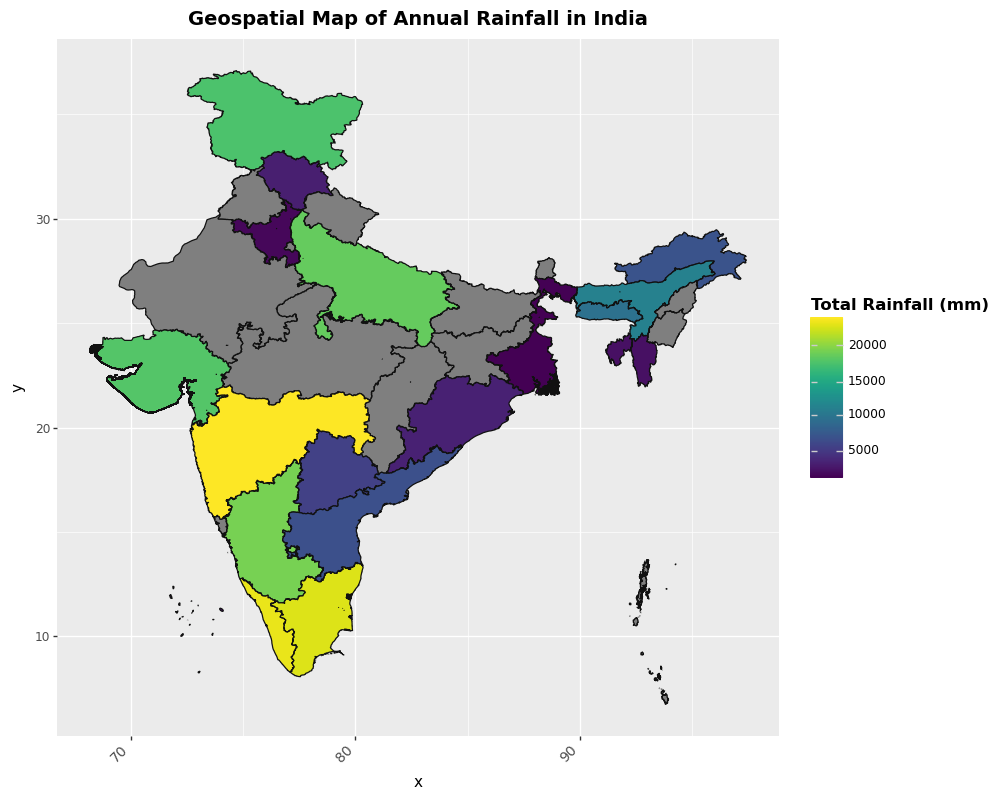

In [13]:
# @title Geospatial Map of Annual Rainfall in India
# Import necessary libraries
from plotnine import *
import pandas as pd
import geopandas as gpd

# Load the dataset
df = pd.read_csv("final_rain.csv")
# Sum over all the months and stations for each state
df['Total_Rainfall_All_Months_All_Stations'] = df.iloc[:, 3:].sum(axis=1)

#Group by state and sum over all stations
statewise_total_rainfall = df.groupby('State')['Total_Rainfall_All_Months_All_Stations'].sum().reset_index()

# Load the shapefile of Indian states
india_states = gpd.read_file("Indian_States.shp")
india_states['st_nm'] = india_states['st_nm'].replace('Arunanchal Pradesh', 'Arunachal Pradesh')
# Merge the shapefile with the rainfall data
merged_data = india_states.merge(statewise_total_rainfall, how='left', left_on='st_nm', right_on='State')

# Plot geospatial map of India with rainfall data
geospatial_map = (
    ggplot() +
    geom_map(merged_data, aes(fill='Total_Rainfall_All_Months_All_Stations', map_id='id')) +
    expand_limits(x=india_states.bounds["maxx"], y=india_states.bounds["maxy"]) +
    labs(
        fill='Total Rainfall (mm)',
        title='Geospatial Map of Annual Rainfall in India'
    ) +
    theme(
        figure_size=(10, 8),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        strip_text=element_text(size=12),  # Adjust facet labels
        plot_title=element_text(size=14, face='bold', hjust=0.5)  # Adjust title size, bold, and centering
    )
)

# Display the geospatial map
geospatial_map.draw()

#### Observations ▶

* Why does the Western Ghat Belt receive higher rainfall than its Eastern counterpart?

  ➡ The Western Ghats in India receive rainfall due to orographic rainfall, which occurs when winds from the Arabian Sea climb the slopes of the mountains and cool, causing the windward side to receive heavy rainfall. The winds rise, expand, cool, condense, and shed their moisture on the western slopes, resulting in more rainfall.

### Analysis of top stations which receives highest rainfall

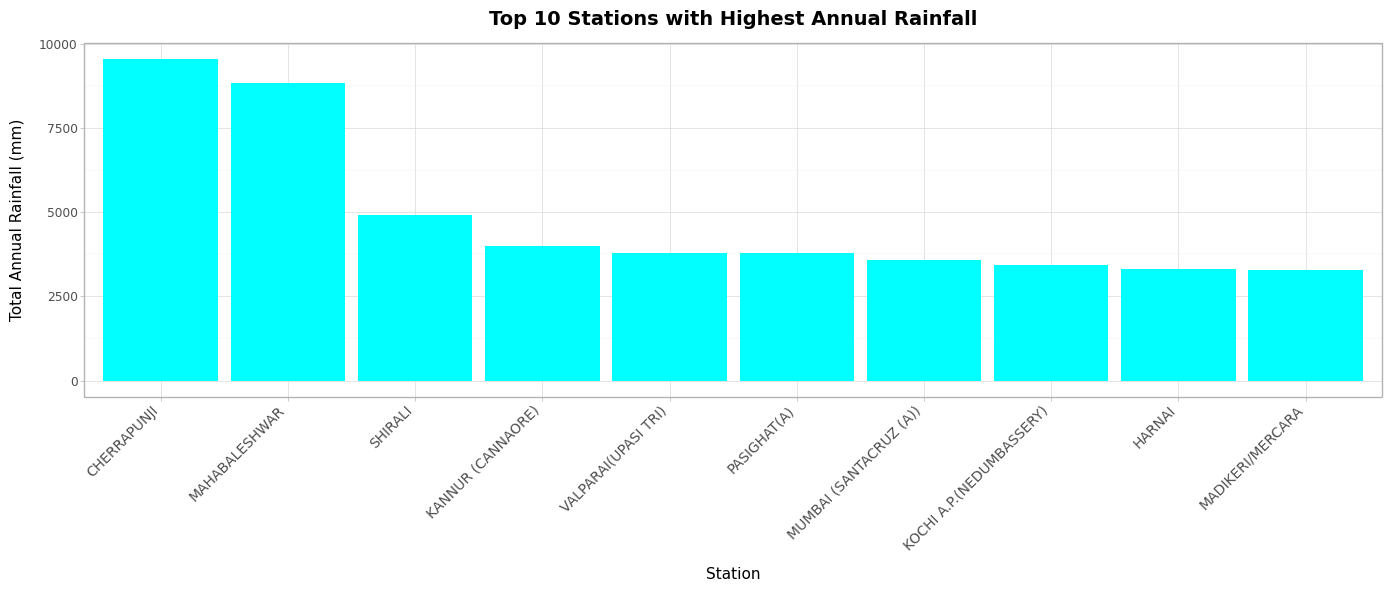

In [14]:
# @title Sorted bar plot of stationwise rainfall
# Import necessary libraries
from plotnine import *
import pandas as pd

# Load the dataset
df = pd.read_csv("final_rain.csv")
# Sum over all the months for each station
df['Total_Rainfall_Annual'] = df.iloc[:, 3:].sum(axis=1)

# Select the top 10 stations with highest annual rainfall
top_10_stations = df[['Station Name', 'Total_Rainfall_Annual']].nlargest(10, 'Total_Rainfall_Annual')

# Sort the top 10 stations by Total_Rainfall_Annual
top_10_stations_sorted = top_10_stations.sort_values(by='Total_Rainfall_Annual', ascending=False)

# Create a bar chart for the top 10 stations
top_10_stations_chart = (
    ggplot(top_10_stations_sorted, aes(x=pd.Categorical(top_10_stations_sorted['Station Name'], categories=top_10_stations_sorted['Station Name'].to_list()), y='Total_Rainfall_Annual')) +
    geom_bar(stat='identity', fill='#02FFFF') +
    theme_minimal() +
    labs(
        x='Station',
        y='Total Annual Rainfall (mm)',
        title='Top 10 Stations with Highest Annual Rainfall'
    ) +
    theme_light() +
    theme(
        figure_size=(14, 6),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12),  # Adjust facet labels
        plot_title=element_text(size=14, face='bold', hjust=0.5)  # Adjust title size, bold, and centering
    )
)

# Display the sorted bar chart
top_10_stations_chart.draw()


### Rainfall variation across the states for every month

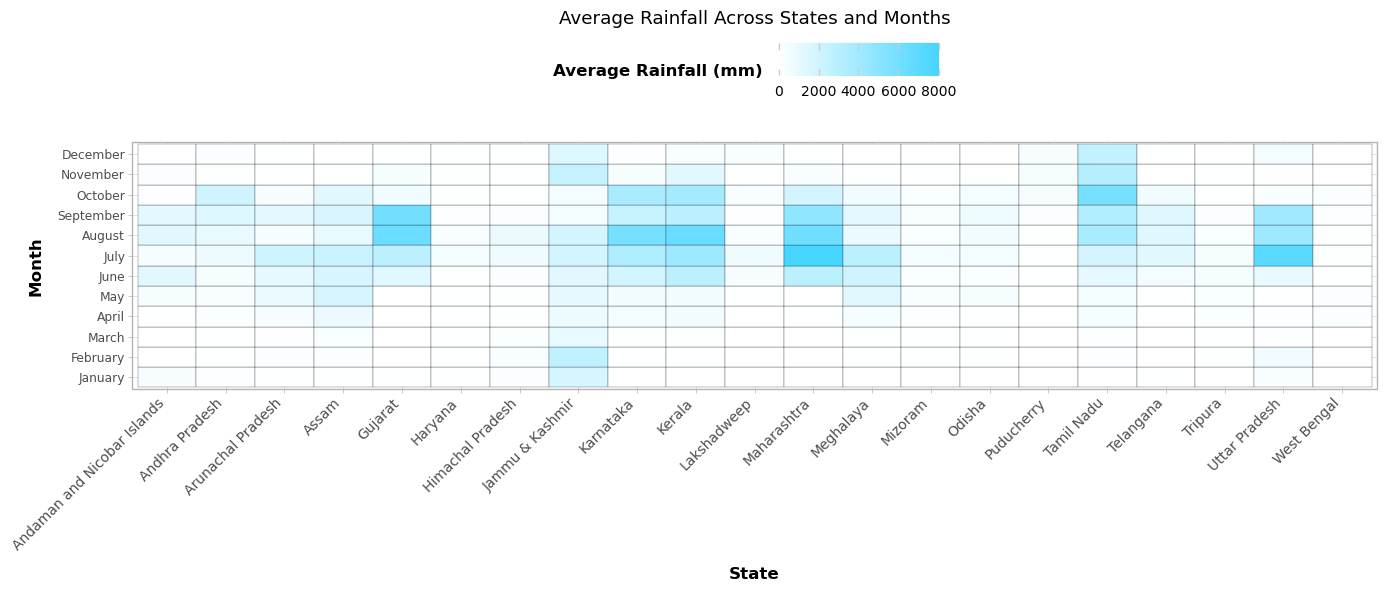

In [15]:
# @title ### Average Rainfall Across States and Months

# Import necessary libraries
from plotnine import *
import pandas as pd
import calendar

# Load the rainfall dataset
rainfall_df = pd.read_csv("final_rain.csv")

# Drop unnecessary columns
rainfall_df = rainfall_df.drop(['Station Name', 'District'], axis=1)

# Convert rainfall columns to numeric, coercing non-numeric values to NaN
rainfall_df.iloc[:, 1:] = rainfall_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Get full month names
month_names = [calendar.month_name[i] for i in range(1, 13)]
rainfall_df.columns = ['State'] + month_names

# Step 1: Calculate average rainfall for each state and month
rainfall_avg = rainfall_df.groupby(['State']).sum()

# Reshape the DataFrame so that months become a separate categorical variable
rainfall_avg_melted = rainfall_avg.reset_index().melt(id_vars=['State'], var_name='Month', value_name='Average Rainfall')

# Convert 'Month' variable to categorical with custom sort order
rainfall_avg_melted['Month'] = pd.Categorical(rainfall_avg_melted['Month'], categories=month_names, ordered=True)

# Plotting heatmap for rainfall_avg_melted DataFrame with improved aesthetics and colorbar at the top
plot_rainfall_heatmap = (
    ggplot(rainfall_avg_melted, aes(x='State', y='Month', fill='Average Rainfall')) +
    geom_tile(color="black") +  # Add black borders to each tile
    scale_fill_gradient(low="white", high="#46D5FF", guide=guide_colorbar(position='top')) +  # Color scale with colorbar at the top
    labs(title="Average Rainfall Across States and Months",
         x="State",
         y="Month",
         fill="Average Rainfall (mm)") +
    theme_minimal() +
    theme_light() +
    theme(
        figure_size=(14, 6),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        axis_title=element_text(size=12, face='bold'),  # Adjust axis titles\
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)

# Display the heatmap for average rainfall with improved aesthetics and colorbar at the top
plot_rainfall_heatmap.draw()

#### Observations ▶

* Most of the states receives rainfall during the months of June to October while Tamil Nadu receives rainfall till December and Jammu & Kashmir receives rainfall almost throughout the entire year except September & October.

### Let's try to find the Correlation between Temperature & Rainfall.

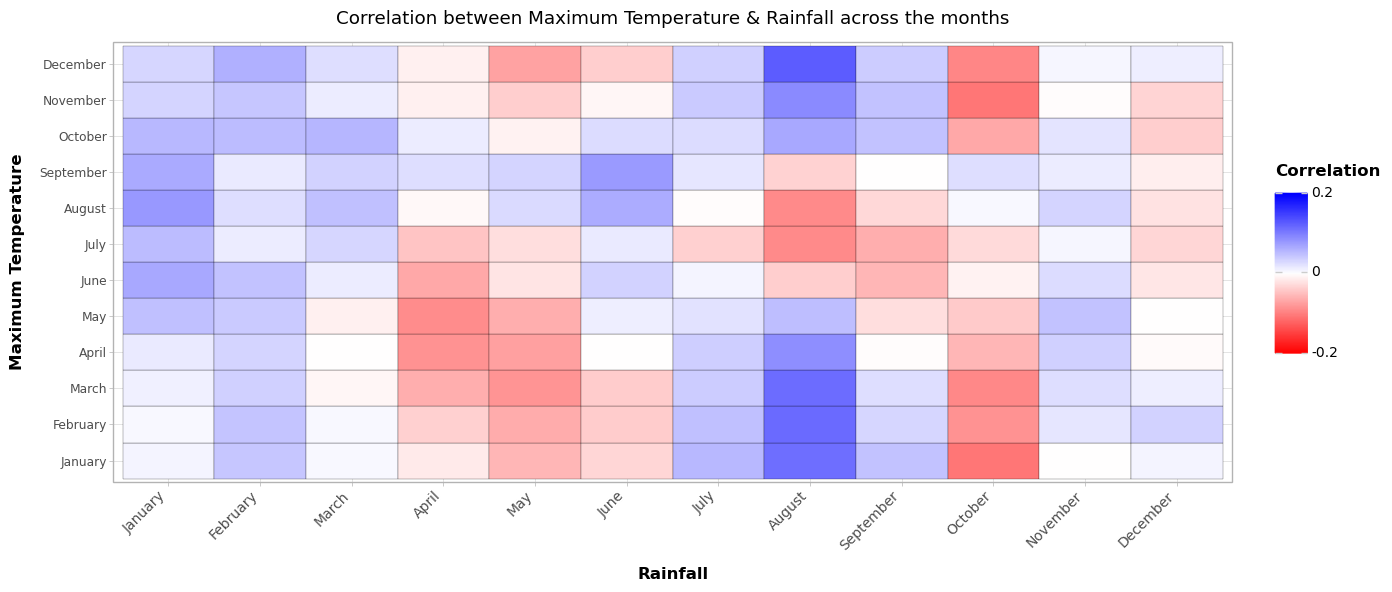

In [16]:
# @title ### Heatmap of correlation among the months for Temperature & Rainfall
import pandas as pd
import calendar
from plotnine import *
import numpy as np

# Read the datasets into pandas dataframes
final_max_temp_df = pd.read_csv("final_max_temp.csv")
final_min_temp_df = pd.read_csv("final_min_temp.csv")
final_rain_df = pd.read_csv("final_rain.csv")

# Drop unnecessary columns
final_max_temp_df.drop(['State', 'District'], inplace=True, axis=1)
final_rain_df.drop(['State', 'District'], inplace=True, axis=1)

# Rename columns with month names
month_names = [calendar.month_name[i] for i in range(1, 13)]
final_max_temp_df.columns = ['Station Name'] + month_names
final_rain_df.columns = ['Station Name'] + month_names

columns_df1 = final_max_temp_df.columns[1:]
columns_df2 = final_rain_df.columns[1:]
# Initialize an empty correlation matrix
correlation_matrix = pd.DataFrame(index=columns_df1, columns=columns_df2)

# Compute correlation for each pair of columns
for col1 in columns_df1:
    for col2 in columns_df2:
        correlation = final_max_temp_df[col1].corr(final_rain_df[col2])
        correlation_matrix.loc[col1, col2] = correlation

# Convert correlation matrix to long format
correlation_matrix_long = correlation_matrix.stack().reset_index()
correlation_matrix_long.columns = ['df1_column', 'df2_column', 'correlation']
correlation_matrix_long['correlation'] = pd.to_numeric(correlation_matrix_long['correlation'])  # Convert to numeric
# Create heatmap using plotnine
heatmap = (ggplot(correlation_matrix_long, aes(x='df2_column', y='df1_column', fill='correlation')) +
           geom_tile(color='black') +
           scale_fill_gradient2(low="red", mid="white", high="blue",
                                limits=(-0.2, 0.2), midpoint=0,
                                name="Correlation",
                                breaks=[-0.2, 0, 0.2],
                                labels=["-0.2", "0", "0.2"]) +
           labs(x="Rainfall", y="Maximum Temperature", title="Correlation between Maximum Temperature & Rainfall across the months") +
           theme_minimal() +
           theme_light() +
            theme(
                figure_size=(14, 6),  # Enlarge figure size
                axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
                axis_title=element_text(size=12, face='bold'),  # Adjust axis titles
                legend_position='right',  # Move legend to the right
                legend_title=element_text(size=12, face='bold'),  # Adjust legend title
                legend_text=element_text(size=10),  # Adjust legend text
                strip_text=element_text(size=12)  # Adjust facet labels
            ) +
           scale_x_discrete(limits=columns_df2) +  # Specify column order for df2
           scale_y_discrete(limits=columns_df1))   # Specify column order for df1

heatmap.draw()

#### Observations ▶

* There's not much correlation which is observed but we can see an alternate pattern of blue and red combination of columns.

* Average temperature data over the months may have higher correlation with rainfall, but I was unable to find such data for these many stations.

### Now we discuss about the changes in Ground Water Level - Pre & Post Monsoon

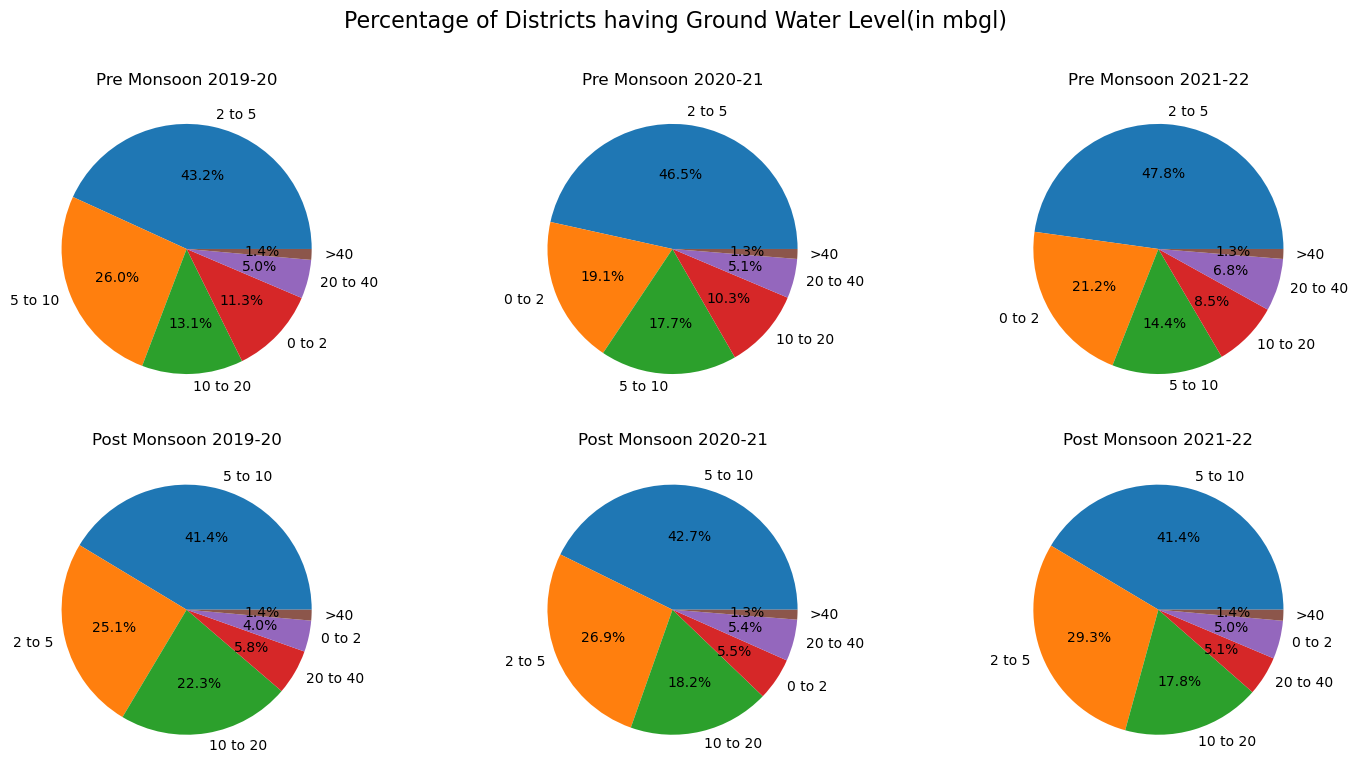

In [17]:
# @title Pie chart for Ground water level
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Step 1: Read the data
data = pd.read_excel("Water_Levels.xlsx")

# Step 2: Drop rows with missing values in the 'Year' column
data = data.dropna(subset=['Year', 'Water Level'])

# Step 3: Separate pre-monsoon and post-monsoon data
pre_monsoon_data = data[data['Water Level'].str.contains('Pre Monsoon')]
post_monsoon_data = data[data['Water Level'].str.contains('Post Monsoon')]

# Step 4: Remove unnecessary columns
pre_monsoon_data.drop(['State', 'District'], inplace=True, axis=1)
post_monsoon_data.drop(['State', 'District'], inplace=True, axis=1)

pre_monsoon_data.columns = ['Year'] + ['Water Level(in mbgl)']
post_monsoon_data.columns = ['Year'] + ['Water Level(in mbgl)']

# Step 5: Remove suffix from 'Water Level(in mbgl)' column
pre_monsoon_data['Water Level(in mbgl)'] = pre_monsoon_data['Water Level(in mbgl)'].str.replace(' Pre Monsoon \(in mbgl\)', '', regex=True)
post_monsoon_data['Water Level(in mbgl)'] = post_monsoon_data['Water Level(in mbgl)'].str.replace(' Post Monsoon \(in mbgl\)', '', regex=True)
pre_monsoon_data['Water Level(in mbgl)'] = pre_monsoon_data['Water Level(in mbgl)'].str.replace('>15', '10 to 20', regex=True)
pre_monsoon_data['Water Level(in mbgl)'] = pre_monsoon_data['Water Level(in mbgl)'].str.replace('10 to 15', '10 to 20', regex=True)
pre_monsoon_data['Water Level(in mbgl)'] = pre_monsoon_data['Water Level(in mbgl)'].str.replace('5 to10', '5 to 10', regex=True)
pre_monsoon_data['Water Level(in mbgl)'] = pre_monsoon_data['Water Level(in mbgl)'].str.replace('2 T0 5', '2 to 5', regex=True)
post_monsoon_data['Water Level(in mbgl)'] = post_monsoon_data['Water Level(in mbgl)'].str.replace('>15', '10 to 20', regex=True)
post_monsoon_data['Water Level(in mbgl)'] = post_monsoon_data['Water Level(in mbgl)'].str.replace('10 to 15', '10 to 20', regex=True)
post_monsoon_data['Water Level(in mbgl)'] = post_monsoon_data['Water Level(in mbgl)'].str.replace('5 to10', '5 to 10', regex=True)
post_monsoon_data['Water Level(in mbgl)'] = post_monsoon_data['Water Level(in mbgl)'].str.replace('2 T0 5', '2 to 5', regex=True)
pre_monsoon_data.drop(pre_monsoon_data[pre_monsoon_data['Water Level(in mbgl)'] == 'N.A.'].index, inplace=True)
post_monsoon_data.drop(post_monsoon_data[post_monsoon_data['Water Level(in mbgl)'] == 'N.A.'].index, inplace=True)

plt.figure(figsize=(15, 8))

for i, year in enumerate(['2019-20', '2020-21', '2021-22']):
    plt.subplot(2, 3, i + 1)
    post_monsoon_data.loc[post_monsoon_data['Year'] == year, 'Water Level(in mbgl)'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pre Monsoon {year}')
    plt.ylabel('')


for i, year in enumerate(['2019-20', '2020-21', '2021-22']):
    plt.subplot(2, 3, i + 4)
    pre_monsoon_data.loc[pre_monsoon_data['Year'] == year, 'Water Level(in mbgl)'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Post Monsoon {year}')
    plt.ylabel('')

plt.suptitle('Percentage of Districts having Ground Water Level(in mbgl)', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()


#### Observations ▶

* There's an increase in the percentage of districts having higher ground water level values and a decrease in the percentage of districts with lower water level values post monsoon as compared to pre monsoon.

# Air Quality

Let's now talk about how Air Quality varied across India, over the past few years

### First we see a Nationwide overview of Air Quality for 2015-2020

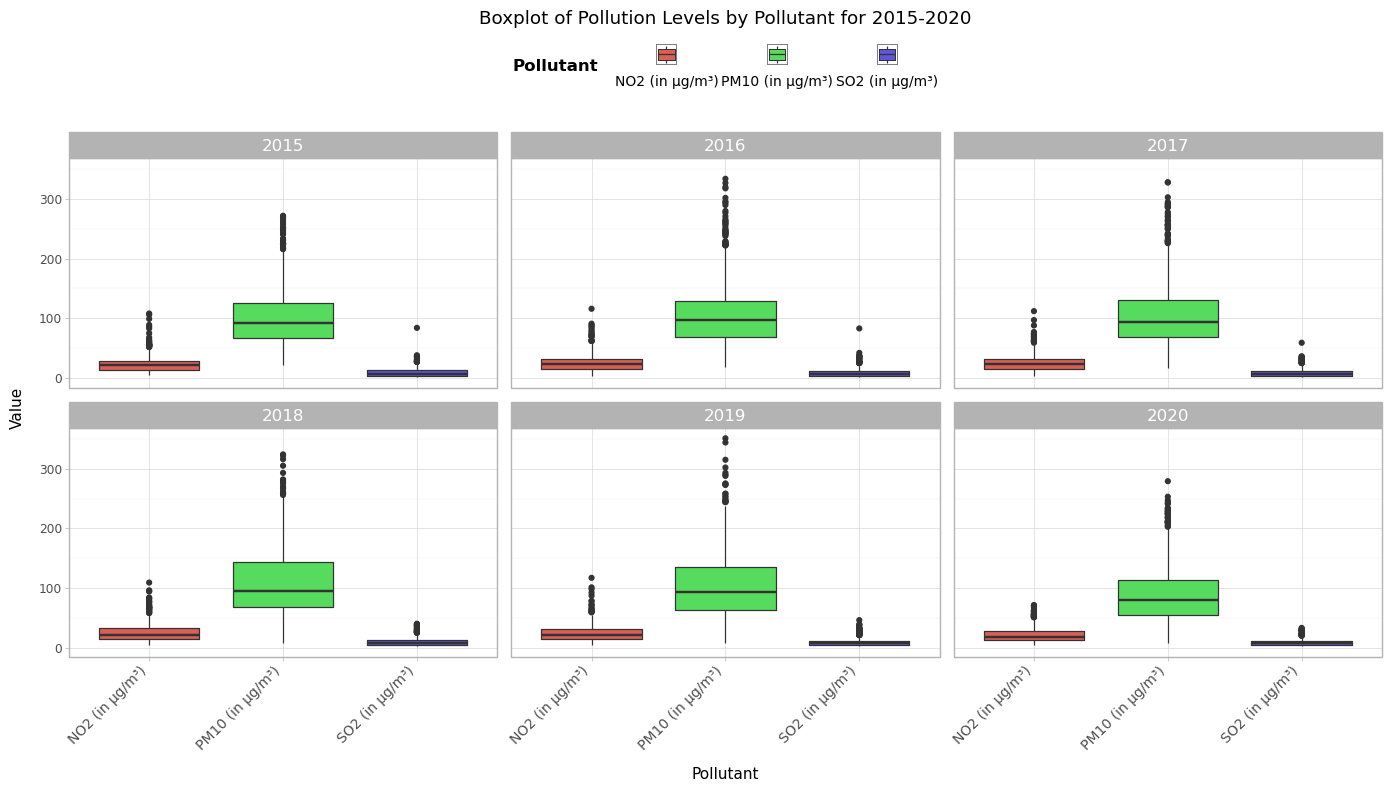

In [18]:
# @title Boxplot of Pollution Levels by Pollutant for 2015-2020
import pandas as pd
from plotnine import *

# Load data for each year from 2015 to 2020
years_data = []
for year in range(2015, 2021):
    filename = f"Air Quality Maps {year}.xlsx"
    data = pd.read_excel(filename)
    # Drop the column PM2.5 (in μg/m³)
    data.drop(columns=['PM2.5 (in μg/m³)'], inplace=True)
    # Melt the dataframe
    melted_data = pd.melt(data, id_vars=['State', 'City', 'Location'],
                          value_vars=['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)'],
                          var_name='Pollutant', value_name='Value')
    # Convert the pollutant values to numeric
    melted_data['Value'] = pd.to_numeric(melted_data['Value'], errors='coerce')
    # Add a new column for the year
    melted_data['Year'] = year
    years_data.append(melted_data)

# Combine the data for all years
combined_data = pd.concat(years_data)

# Create the boxplot
combined_plot = (
    ggplot(combined_data, aes(x='Pollutant', y='Value', fill='Pollutant')) +
    geom_boxplot(na_rm=True) +
    facet_wrap('~ Year') +  # Facet wrap by the 'Year' column
    labs(title="Boxplot of Pollution Levels by Pollutant for 2015-2020",
         x="Pollutant", y="Value", fill="Pollutant") +
    theme_minimal() +
    theme_light() +  # Set light background
    theme(
        figure_size=(14, 8),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)

# Display the combined plot
combined_plot.draw()


#### Observations ▶

* There's an increase in the concentration of PM10 across the years from 2015-2019 and a sudden decrement in 2020 because of Lockdown throughout the country due to Covid.

* NO2 concentration is more or less the same across the years from 2015-2019 with a slight decrease in 2020.

* SO2 concentration decreases slightly over the years from 2015-2020.

### Now analysis Air Quality statewise

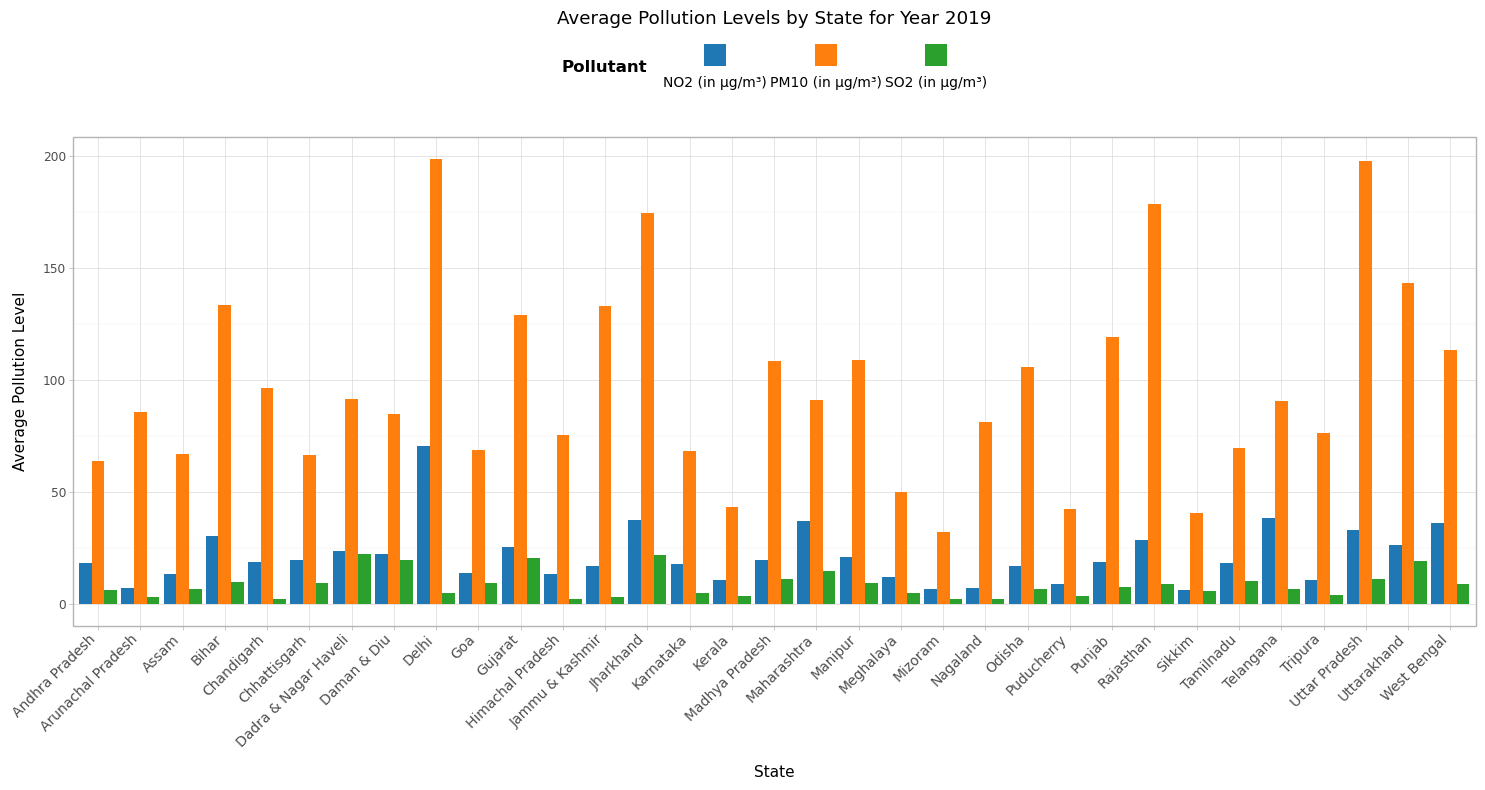

In [19]:
# @title Bar plot for statewise average pollution levels for year 2019
import pandas as pd
from plotnine import *

# Load data for the year 2019
data_2019 = pd.read_excel("Air Quality Maps 2019.xlsx")

# Drop the column PM2.5 (in μg/m³)
data_2019.drop(columns=['PM2.5 (in μg/m³)'], inplace=True, axis=1)

# Convert numeric columns to numeric types
numeric_columns = ['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)']
data_2019[numeric_columns] = data_2019[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group data by State and calculate the average pollution levels for each pollutant
average_pollution_by_state = data_2019.groupby('State')[numeric_columns].mean().reset_index()

# Melt the dataframe to convert it from wide to long format
melted_data = pd.melt(average_pollution_by_state, id_vars=['State'],
                      value_vars=numeric_columns,
                      var_name='Pollutant', value_name='Average Pollution Level')

# Create the bar chart
bar_chart = (
    ggplot(melted_data, aes(x='State', y='Average Pollution Level', fill='Pollutant')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title="Average Pollution Levels by State for Year 2019",
         x="State", y="Average Pollution Level", fill="Pollutant") +
    theme_light() +  # Set light background
    theme(
        figure_size=(15, 8),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    ) +
    scale_fill_manual(values=["#1f77b4", "#ff7f0e", "#2ca02c"])  # Set custom colors
)

# Display the bar chart
bar_chart.draw()


#### Observations ▶

* Delhi has the maximum concentration of PM10 & NO2 as the main sources of these pollutants are brush/waste burning, landfills, wildfires and agriculture (from the surrounding states) & fossil fuels consumed by cars respectively.

* One thing can be observed that States having higher values of PM10, also have higher values of NO2 as compared to other states but SO2 doesn't follow similar trends.

* Jharkhand has the maximum concentration of SO2 which can be attributed to the fact that Industrial gaseous waste is the major source of SO2.

* Mizoram has the least concentration of all the pollutants.

### Visualization on Indian Map


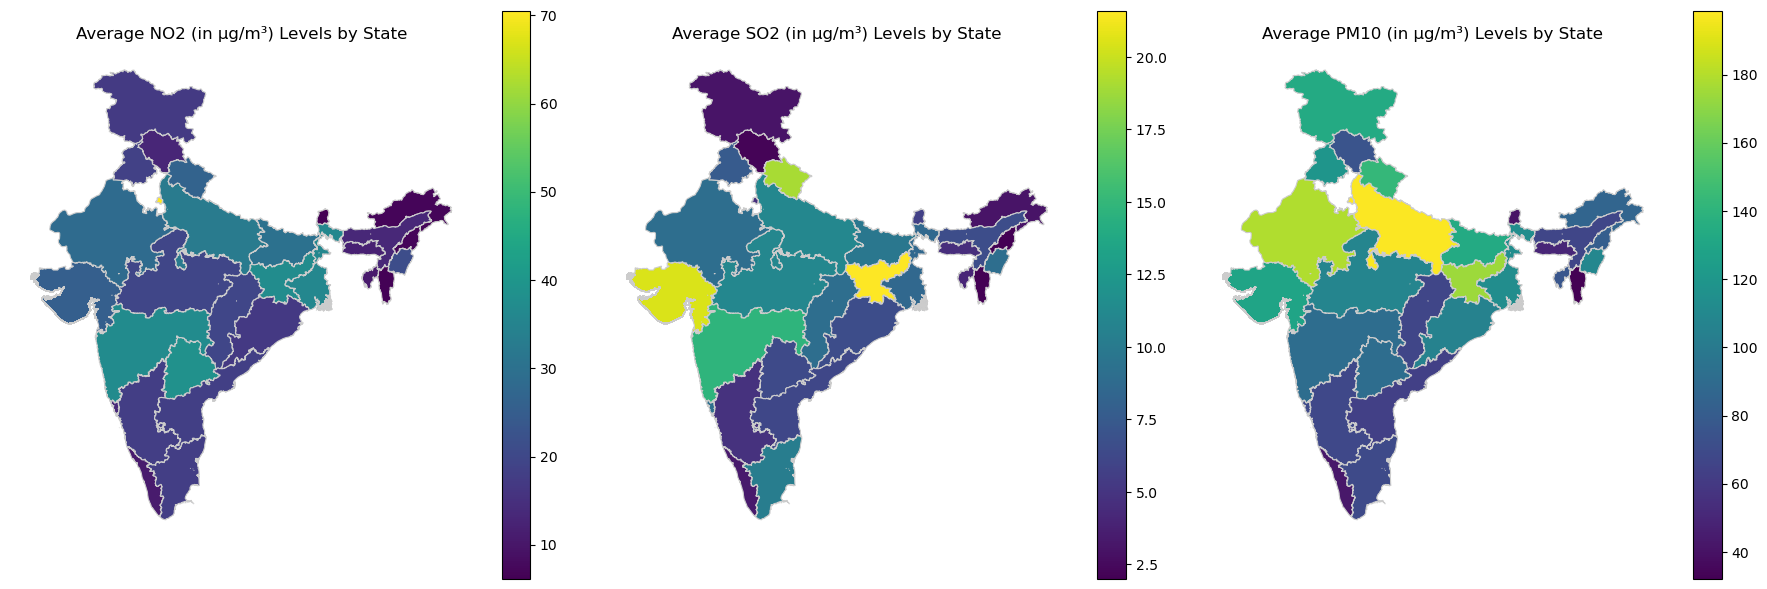

In [20]:
# @title Geospatial map of Air Quality temperature in India
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile of Indian states
india_states = gpd.read_file("Indian_States.shp")
india_states['st_nm'] = india_states['st_nm'].replace('Arunanchal Pradesh', 'Arunachal Pradesh')
# print(india_states[india_states['st_nm'] == 'Punjab']['st_nm'].unique())
# Load data for the year 2019
data_2019 = pd.read_excel("Air Quality Maps 2019.xlsx")
data_2019.replace(to_replace='Tamilnadu',value='Tamil Nadu',inplace=True)
india_states.replace(to_replace='NCT of Delhi',value='Delhi',inplace=True)

# Drop the column PM2.5 (in μg/m³)
data_2019.drop(columns=['PM2.5 (in μg/m³)'], inplace=True, axis=1)

# Convert numeric columns to numeric types
numeric_columns = ['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)']
data_2019[numeric_columns] = data_2019[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group data by State and calculate the average pollution levels for each pollutant
average_pollution_by_state = data_2019.groupby('State')[numeric_columns].mean().reset_index()

# Merge pollution data with shapefile
merged_data = india_states.merge(average_pollution_by_state, how='left', left_on='st_nm', right_on='State')
# Create geospatial plots for each pollutant
pollutants = ['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    merged_data.plot(column=pollutant, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Average {pollutant} Levels by State')
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Observations ▶

* Southern, North-Eastern & Extreme Northern states have low concentration of all Pollutants.

### Let's check the correlations among the pollutants.

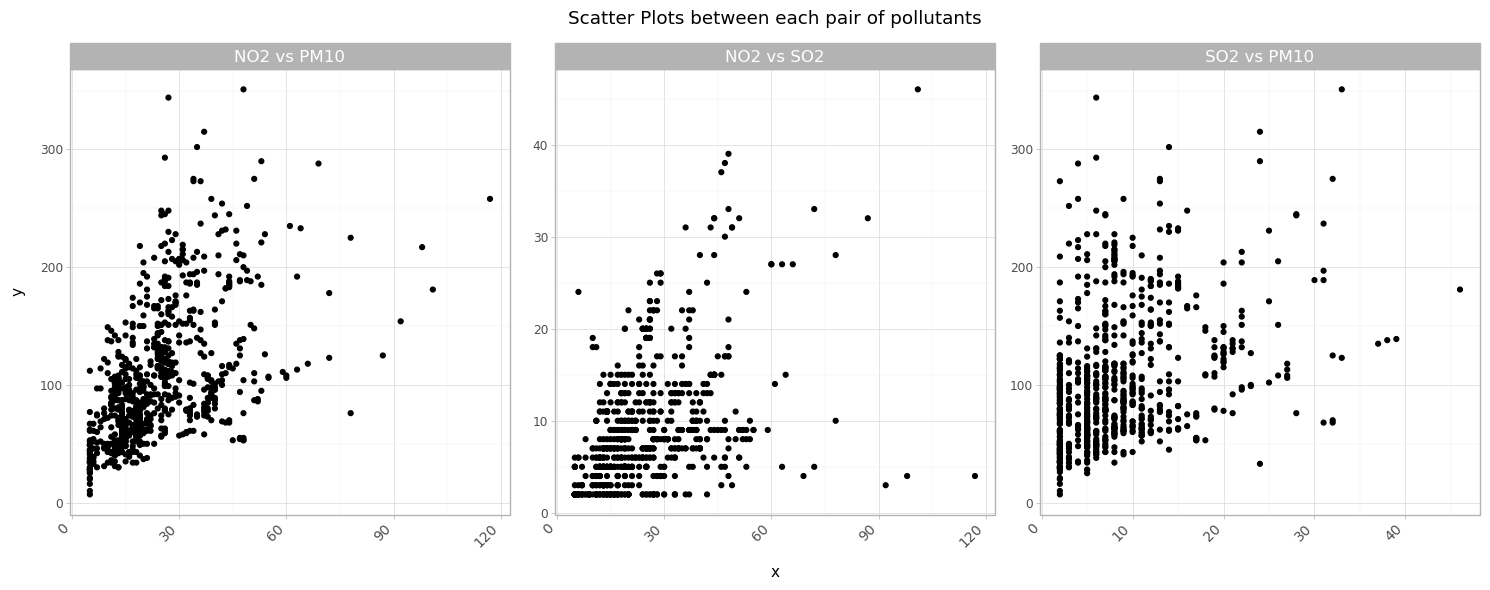

In [21]:
# @title Scatter Plots between each pair of pollutants
import pandas as pd
from plotnine import *

# Load the data from the Excel file
data = pd.read_excel("Air Quality Maps 2019.xlsx")

# Drop the column PM2.5 (in μg/m³)
data.drop(columns=['PM2.5 (in μg/m³)'], inplace=True)

# Convert non-numeric values to NaN
data['NO2 (in μg/m³)'] = pd.to_numeric(data['NO2 (in μg/m³)'], errors='coerce')
data['SO2 (in μg/m³)'] = pd.to_numeric(data['SO2 (in μg/m³)'], errors='coerce')
data['PM10 (in μg/m³)'] = pd.to_numeric(data['PM10 (in μg/m³)'], errors='coerce')

# Drop rows with NaN values
data = data.dropna(subset=['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)'])

# Combine the data for all scatter plots
combined_data = pd.concat([
    pd.DataFrame({'x': data['NO2 (in μg/m³)'], 'y': data['SO2 (in μg/m³)'], 'Pollutant': 'NO2 vs SO2'}),
    pd.DataFrame({'x': data['NO2 (in μg/m³)'], 'y': data['PM10 (in μg/m³)'], 'Pollutant': 'NO2 vs PM10'}),
    pd.DataFrame({'x': data['SO2 (in μg/m³)'], 'y': data['PM10 (in μg/m³)'], 'Pollutant': 'SO2 vs PM10'})
], ignore_index=True)

# Create scatter plots
scatter_plots = (
    ggplot(combined_data, aes(x='x', y='y')) +
    geom_point() +
    facet_wrap('~Pollutant', scales='free') +
    labs(title="Scatter Plots between each pair of pollutants") +
    theme_light() +  # Set light background
    theme(
        figure_size=(15, 6),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)

# Display the combined plot
scatter_plots.draw()


#### Observations ▶

* NO2 and PM10 are more correlated, followed by NO2 and SO2.

* More correlation may conclude that they have same major source.

### Analysis of the most infamous city for Pollution i.e. Delhi across the past few years

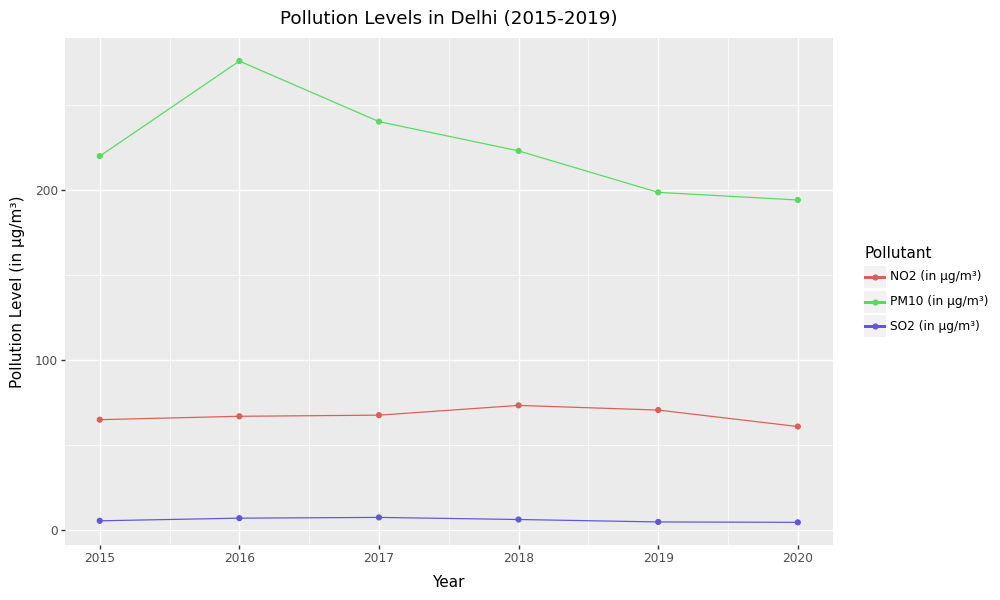

In [22]:
# @title Time Series plot for the concentration of Pollutants for Delhi
import pandas as pd
from plotnine import *

pd.options.mode.chained_assignment = None  # default='warn'
# Load data from each Excel file, extract year from file name, and store it in a list
file_names = ["Air Quality Maps 2015.xlsx", "Air Quality Maps 2016.xlsx", "Air Quality Maps 2017.xlsx",
              "Air Quality Maps 2018.xlsx", "Air Quality Maps 2019.xlsx", "Air Quality Maps 2020.xlsx"]

data_frames = []
for file_name in file_names:
    year = int(file_name.split()[3].split(".")[0])  # Extract year from file name
    df = pd.read_excel(file_name)
    df['Year'] = year  # Add year column
    data_frames.append(df)

# Combine all data frames into a single data frame
data = pd.concat(data_frames, ignore_index=True)

# Drop the column PM2.5 (in μg/m³)
data.drop(columns=['PM2.5 (in μg/m³)'], inplace=True)

# Convert pollution level columns to numeric data types
data[['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)']] = \
    data[['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)']].apply(pd.to_numeric, errors='coerce')

# Filter data for City = Delhi
delhi_data = data[data['City'] == 'Delhi']

delhi_data.drop(columns=['State', 'Location', 'City'], inplace=True)
# Group the data by Year and calculate the average pollution levels for each pollutant
average_delhi_data = delhi_data.groupby('Year').mean()[['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)']]

# Reset the index to make 'Year' a column instead of the index
average_delhi_data.reset_index(inplace=True)

# Melt the data to long format for plotting
melted_data = pd.melt(average_delhi_data, id_vars=['Year'],
                      value_vars=['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)'],
                      var_name='Pollutant', value_name='Value')

# Create the time series plot using plotnine
time_series_plot = (
    ggplot(melted_data, aes(x='Year', y='Value', color='Pollutant')) +
    geom_line() +
    geom_point() +
    labs(title="Pollution Levels in Delhi (2015-2019)",
         x="Year", y="Pollution Level (in μg/m³)") +
    theme(figure_size=(10, 6))
)

# Display the plot
time_series_plot.draw()

#### Observations ▶

* PM10 concentration peaked in 2016 and started decreasing after that.

* NO2 concentration is almost constant but hiked in 2018.

* Similarly with SO2, concentration was at its peak in the year of 2017.

### Analyssis of Statewise Pollutant Concentration over the years

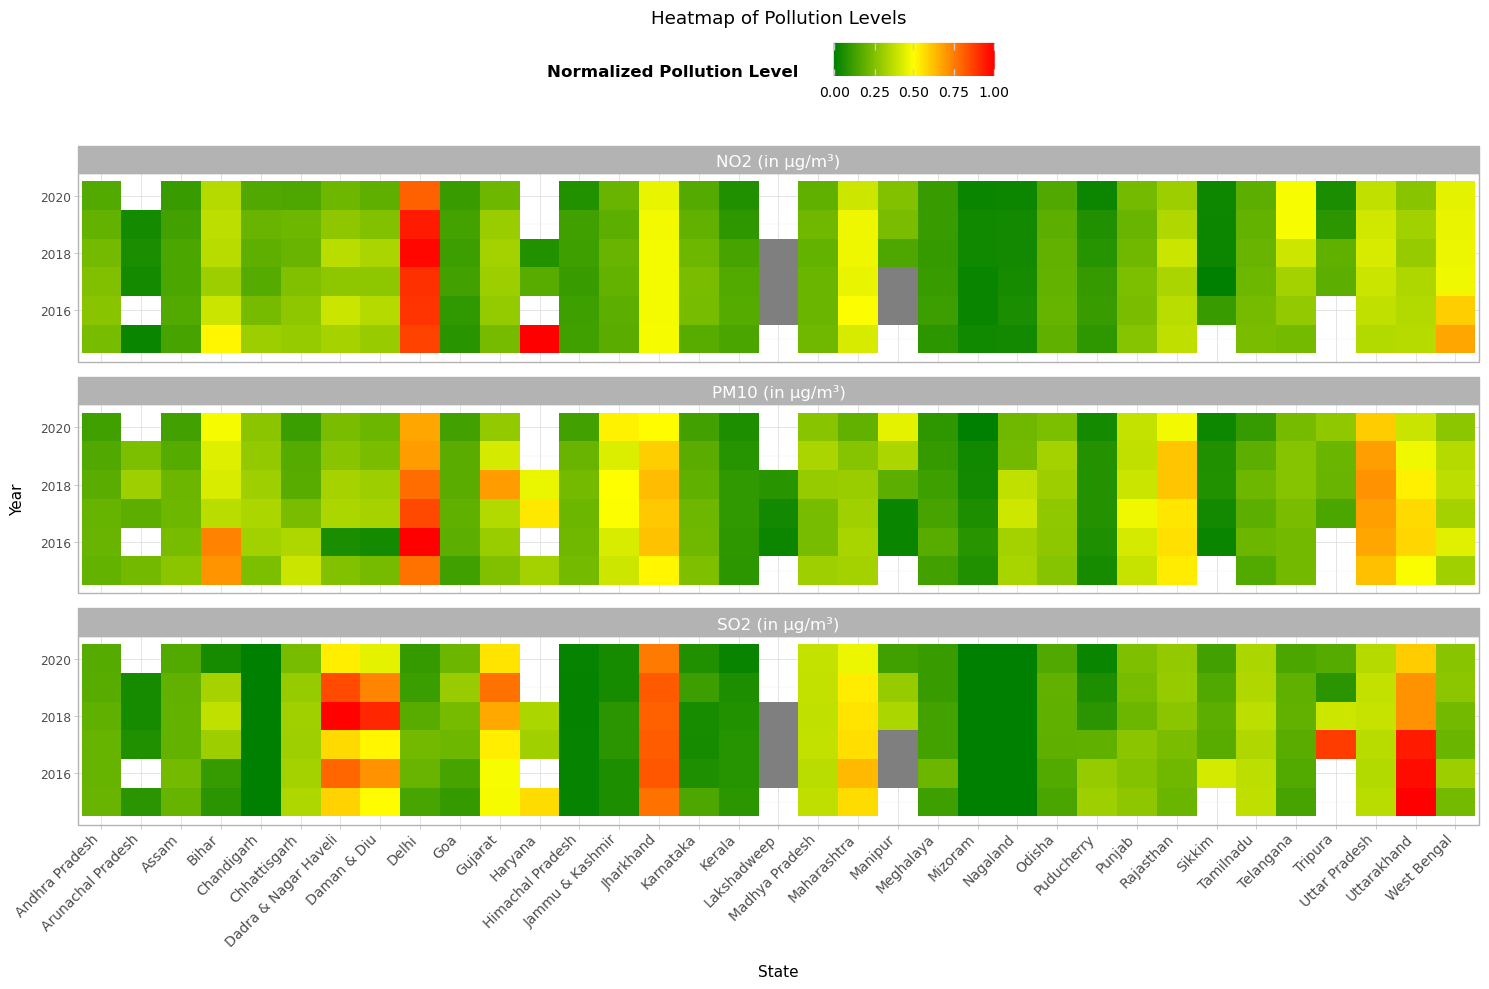

In [23]:
# @title Heatmap of Statewise Pollutant Concentration over the year
from plotnine import *
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data from each Excel file and store it in a list
file_names = ["Air Quality Maps 2015.xlsx", "Air Quality Maps 2016.xlsx", "Air Quality Maps 2017.xlsx",
              "Air Quality Maps 2018.xlsx", "Air Quality Maps 2019.xlsx", "Air Quality Maps 2020.xlsx"]

data_frames = []
for file_name in file_names:
    df = pd.read_excel(file_name)
    # Extract year from the file name and add it as a new column
    year = int(file_name.split()[3].split('.')[0])  # Adjusted splitting logic
    df['Year'] = year
    data_frames.append(df)

# Combine all data frames into a single data frame
data = pd.concat(data_frames, ignore_index=True)

# Drop the column PM2.5 (in μg/m³)
data.drop(columns=['PM2.5 (in μg/m³)', 'City', 'Location'], inplace=True)

# Convert pollutant columns to numeric values
pollutant_columns = ['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)']
data[pollutant_columns] = data[pollutant_columns].apply(pd.to_numeric, errors='coerce')

# Group the data by State, Year, and calculate the mean pollution level for each pollutant
grouped_data = data.groupby(['State', 'Year']).mean().reset_index()

# Normalize the pollution levels within each pollutant category
scaler = MinMaxScaler()
grouped_data[pollutant_columns] = scaler.fit_transform(grouped_data[pollutant_columns])

# Melt the data to long format for plotting the heatmap
melted_data = pd.melt(grouped_data, id_vars=['State', 'Year'],
                      value_vars=pollutant_columns,
                      var_name='Pollutant', value_name='Normalized Pollution Level')

# Create the heatmap
heatmap = (
    ggplot(melted_data, aes(x='State', y='Year', fill='Normalized Pollution Level')) +
    geom_tile() +
    facet_wrap('~Pollutant', ncol=1) +
    labs(title="Heatmap of Pollution Levels",
         x="State", y="Year", fill="Normalized Pollution Level") +
    theme_light() +  # Set light background
    theme(
        figure_size=(15, 10),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    ) +
    scale_fill_gradientn(colors=["green", "yellow", "red"])  # Define custom color gradient
)

# Display the heatmap
heatmap.draw()


#### Observations ▶

* States/UTs like Uttarakhand, Jharkhand, Dadra Nagar Haveli & Daman Diu have high concentrations of SO2 but lower concentrations of the other 2 pollutants opposite to the case of Delhi.

* Normalization of pollutants could help us conclude the above, which was hard to do in the case of Bar-Plot visualization.

* Lack of data of few states for few years.

### Frequency of Location vs concentration value of each pollutant

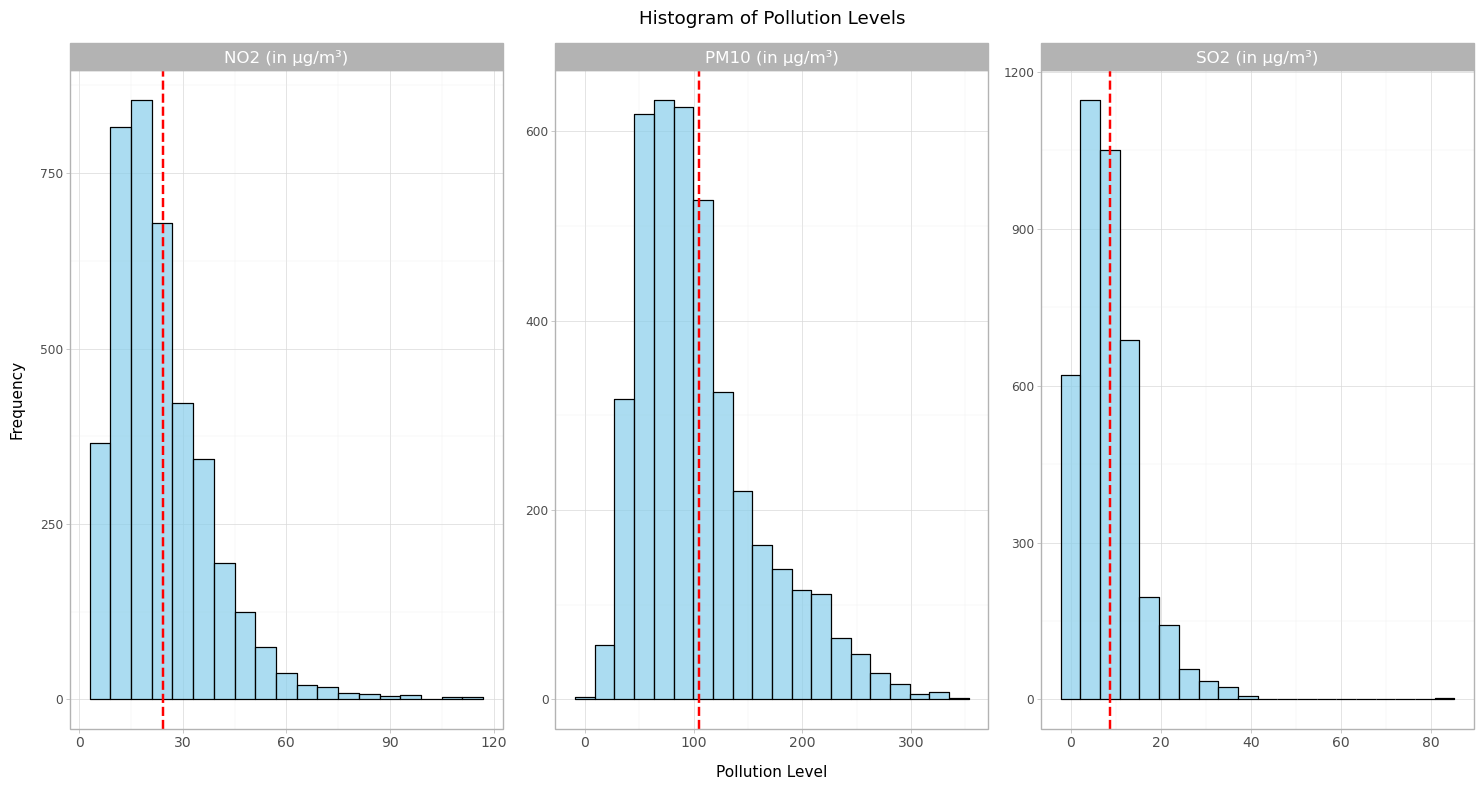

In [24]:
# @title ### Frequency of Location vs concentration value of each pollutants
from plotnine import *
import pandas as pd

# Load data from each Excel file and store it in a list
file_names = ["Air Quality Maps 2015.xlsx", "Air Quality Maps 2016.xlsx", "Air Quality Maps 2017.xlsx",
              "Air Quality Maps 2018.xlsx", "Air Quality Maps 2019.xlsx", "Air Quality Maps 2020.xlsx"]

data_frames = []
for file_name in file_names:
    df = pd.read_excel(file_name)
    # Extract year from the file name and add it as a new column
    year = int(file_name.split()[3].split('.')[0])  # Adjusted splitting logic
    df['Year'] = year
    data_frames.append(df)

# Combine all data frames into a single data frame
data = pd.concat(data_frames, ignore_index=True)

# Drop the column PM2.5 (in μg/m³)
data.drop(columns=['PM2.5 (in μg/m³)', 'City', 'Location'], inplace=True)

# Convert pollutant columns to numeric values
pollutant_columns = ['NO2 (in μg/m³)', 'SO2 (in μg/m³)', 'PM10 (in μg/m³)']
data[pollutant_columns] = data[pollutant_columns].apply(pd.to_numeric, errors='coerce')

# Melt the data to long format for plotting histograms
melted_data = pd.melt(data, value_vars=pollutant_columns,
                      var_name='Pollutant', value_name='Pollution Level')

# Calculate mean values for each pollutant
mean_values = melted_data.groupby('Pollutant')['Pollution Level'].mean().reset_index()

# Create histograms for each pollutant using facet_wrap
histograms = (
    ggplot(melted_data, aes(x='Pollution Level')) +
    geom_histogram(bins=20, color='black', fill='skyblue', alpha=0.7, na_rm=True) +  # Suppress warning by removing non-finite values
    facet_wrap('~Pollutant', scales='free') +
    labs(title="Histogram of Pollution Levels",
         x="Pollution Level", y="Frequency") +
    theme_light() +  # Set light background
    theme(
        figure_size=(15, 8),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=0),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    ) +
    geom_vline(aes(xintercept='Pollution Level'), data=mean_values, color='red', linetype='dashed', size=1)  # Add vertical lines for mean values
)

# Display the histograms
histograms.draw()


#### Observations ▶

* Mean values of each pollutants for all stations over the years are :-

        NO2 ~ 20 μg/m³

        PM10 ~ 105 μg/m³

        SO2 ~ 8 μg/m³

# Forest
Now we're going to focus on Forest Areaa and its type distribution across the country.

### Starting with brief description of types of Forest.

There are 3 types of Forest :-

* Very dense forest (VDF): A canopy density of 70% or higher

* Moderately dense forest (MDF): A canopy density of 40% to more than 70% but less than 70%

* Open forest (OF): A canopy density of 10% or higher but less than 40%

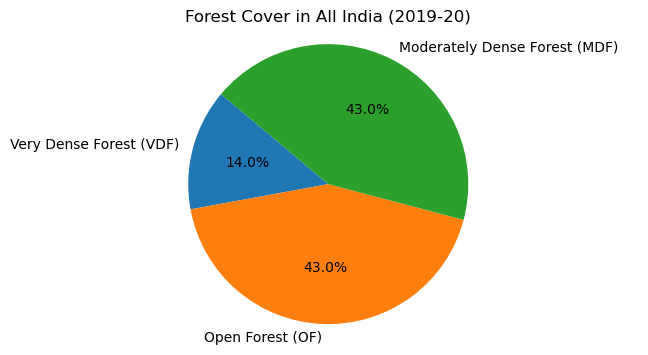

In [25]:
# @title Pie Chart for Forest type cover in All India (2019-20)

import matplotlib.pyplot as plt

data = pd.read_excel('Forest_2019-20.xlsx')
# Get the percentage values for VDF, OF, and MDF
vdf_percentage = data.iloc[0]['VDF (in %)']
of_percentage = data.iloc[0]['OF (in %)']
mdf_percentage = data.iloc[0]['MDF (in %)']

# Create labels for the pie chart
labels = ['Very Dense Forest (VDF)', 'Open Forest (OF)', 'Moderately Dense Forest (MDF)']

# Create values for the pie chart
sizes = [vdf_percentage, of_percentage, mdf_percentage]

# Plot the pie chart
plt.figure(figsize=(8, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Forest Cover in All India (2019-20)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


### Now let's analyse how it varies across the states

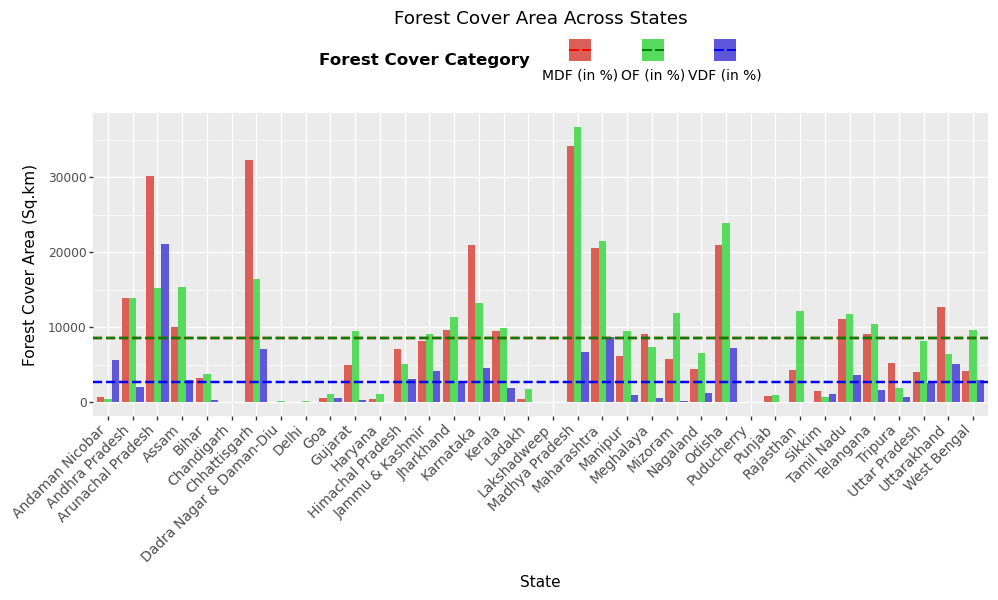

In [26]:
# @title Bar plot of Forest cover area across States
# Import necessary libraries
from plotnine import *
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel("Forest_2019-20.xlsx")

# Exclude the first row (which represents all over India)
data = data.iloc[1:]

# Melt the data to convert forest cover categories into a single column
melted_data = pd.melt(data, id_vars=['State', 'Total Area in Sq.km'],
                      value_vars=['VDF (in %)', 'OF (in %)', 'MDF (in %)'],
                      var_name='Forest Cover Category', value_name='Percentage')

# Calculate the forest cover area by multiplying percentage with the total area
melted_data['Forest Cover Area'] = melted_data['Percentage'] * melted_data['Total Area in Sq.km'] / 100
# Calculate average forest area for each forest cover category
avg_forest_area = melted_data.groupby('Forest Cover Category')['Forest Cover Area'].mean().reset_index()
# Create the bar chart
bar_plot = (
    ggplot(melted_data, aes(x='State', y='Forest Cover Area', fill='Forest Cover Category'))
    + geom_bar(stat='identity', position='dodge')
    + geom_hline(data=avg_forest_area, mapping=aes(yintercept='Forest Cover Area', color='Forest Cover Category'), linetype='dashed', size=1)
    + labs(title="Forest Cover Area Across States",
           x="State", y="Forest Cover Area (Sq.km)")
    + scale_color_manual(values=['red', 'green', 'blue'])  # Match colors with bar plot
    +  theme(
        figure_size=(10, 6),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)
# Display the plot
bar_plot.draw()

#### Observations ▶

* Madhya Pradesh has the maximum area of MDF & OF, followed by Chhattisgarh and Arunachal Pradesh in MDF & Odisha, Maharashtra, Chattisgarh and Arunachal Pradesh in OF

* Arunachal Pradesh has the maximum area of VDF, with no other state close to it.

* Despite of being smaller in area but highly rich in Forest Area that means it'll have highest percentage of Forest Land as compared to Total Land.

### Let's analyse the order of states in Total Forest Cover Area

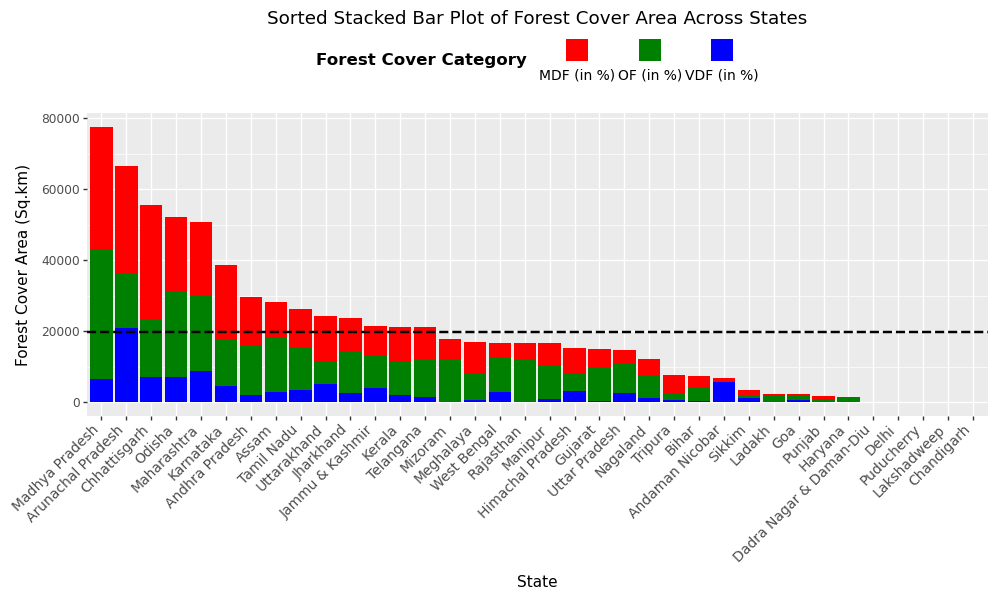

In [28]:
# @title Sorted Stacked Bar Plot of Forest Cover Area Across States
# Import necessary libraries
from plotnine import *
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel("Forest_2019-20.xlsx")

# Exclude the first row (which represents all over India)
data = data.iloc[1:]

# Melt the data to convert forest cover categories into a single column
melted_data = pd.melt(data, id_vars=['State', 'Total Area in Sq.km'],
                      value_vars=['VDF (in %)', 'OF (in %)', 'MDF (in %)'],
                      var_name='Forest Cover Category', value_name='Percentage')

# Calculate the forest cover area by multiplying percentage with the total area
melted_data['Forest Cover Area'] = melted_data['Percentage'] * melted_data['Total Area in Sq.km'] / 100

# Calculate total forest area for each state
total_forest_area = melted_data.groupby('State')['Forest Cover Area'].sum().reset_index()
avg_total_forest_area = total_forest_area['Forest Cover Area'].mean()

# Sort the melted data by total forest cover area
sorted_melted_data = melted_data.merge(total_forest_area, on='State', suffixes=('', '_total'))
sorted_melted_data = sorted_melted_data.sort_values(by='Forest Cover Area_total', ascending=False)

# Convert 'State' variable to categorical with desired order
sorted_melted_data['State'] = pd.Categorical(sorted_melted_data['State'], categories=sorted_melted_data['State'].unique(), ordered=True)

# Create the bar chart
bar_plot = (
    ggplot(sorted_melted_data, aes(x='State', y='Forest Cover Area', fill='Forest Cover Category'))
    + geom_bar(stat='identity', position='stack')
    + geom_hline(yintercept=avg_total_forest_area, color='black', linetype='dashed', size=1)
    + labs(title="Sorted Stacked Bar Plot of Forest Cover Area Across States",
           x="State", y="Forest Cover Area (Sq.km)")
    + scale_fill_manual(values=['red', 'green', 'blue'])  # Match colors with bar plot
    + theme(
        figure_size=(10, 6),  # Enlarge figure size
        axis_text_x=element_text(size=10, angle=45, hjust=1),  # Rotate x-axis labels
        legend_position='top',  # Move legend to the top
        legend_title=element_text(size=12, face='bold'),  # Adjust legend title
        legend_text=element_text(size=10),  # Adjust legend text
        strip_text=element_text(size=12)  # Adjust facet labels
    )
)
# Display the plot
bar_plot.draw()


#### Observations ▶

* Madhya Pradesh has the maximum combined Forest Area, followed by Arunachal Pradesh, Chhatisgarh, Odisha & Maharashtra.

* 14 states have higher Forest area than the country average.


### Visualization on Indian Map for each type of Forest distribution


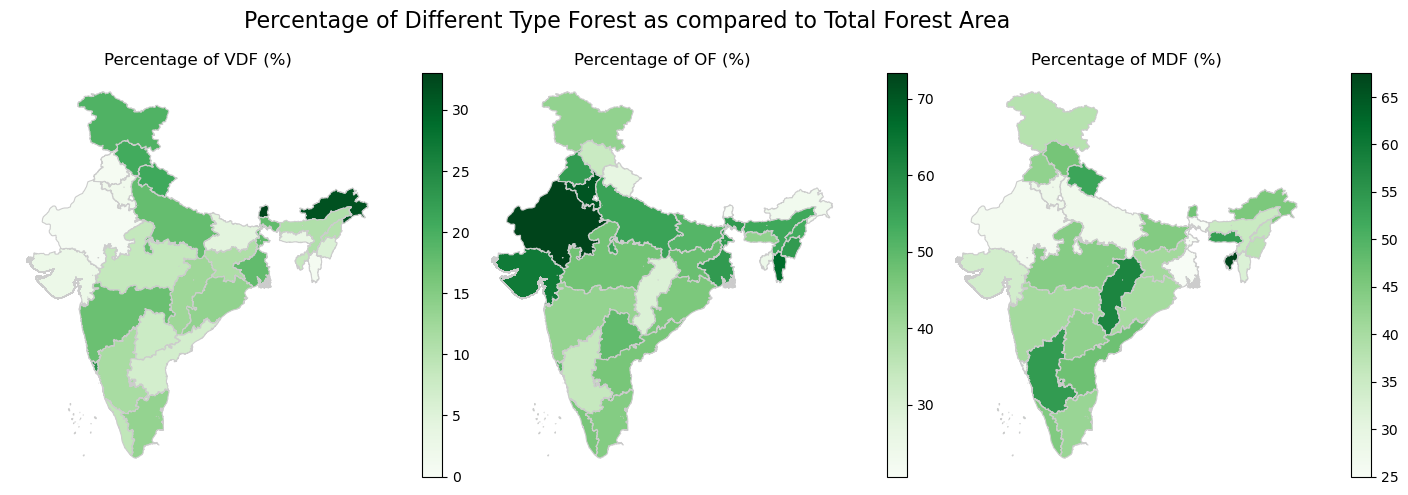

In [29]:
# @title ### Geospatial plots of Forest distribution as compared to Total Forest Area

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import *

# Load the shapefile of Indian states
india_states = gpd.read_file("Indian_States.shp")
india_states['st_nm'] = india_states['st_nm'].replace('Arunanchal Pradesh', 'Arunachal Pradesh')
# Load the forest cover data
data = pd.read_excel("Forest_2019-20.xlsx")

# Exclude the first row (which represents all over India)
data = data.iloc[1:]

# Melt the data to convert forest cover categories into a single column
melted_data = pd.melt(data, id_vars=['State', 'Total Area in Sq.km'],
                      value_vars=['VDF (in %)', 'OF (in %)', 'MDF (in %)'],
                      var_name='Forest Cover Category', value_name='Percentage')

# Calculate the forest cover area by multiplying percentage with the total area
melted_data['Forest Cover Area'] = melted_data['Percentage'] * melted_data['Total Area in Sq.km'] / 100

# Merge forest cover data with shapefile
merged_data = india_states.merge(melted_data, how='left', left_on='st_nm', right_on='State')
# Create geospatial plots for each type of forest
forest_types = ['VDF', 'OF', 'MDF']
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

for i, forest_type in enumerate(forest_types):
    ax = axes[i]
    merged_data[merged_data['Forest Cover Category'] == f'{forest_type} (in %)'].plot(column='Percentage', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Percentage of {forest_type} (%)')
    ax.axis('off')

plt.suptitle("Percentage of Different Type Forest as compared to Total Forest Area", fontsize=16)
plt.subplots_adjust(top=1, bottom=0.9)
plt.tight_layout()
plt.show()


#### Observations ▶

* North-western states have a higher percentage of Open Forest.

* Arunachal Pradesh has the highest percentage of Forest Area, with most of its area being covered by Very Dense Forests.

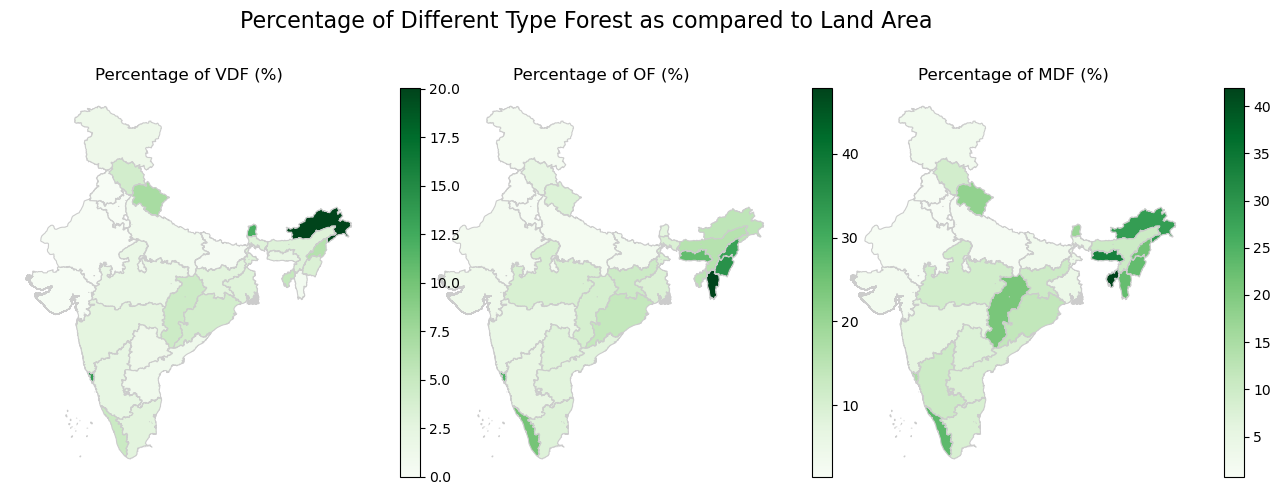

In [30]:
# @title ### Geospatial plots of Forest distribution as compared to Total Land Area

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the shapefile of Indian states
india_states = gpd.read_file("Indian_States.shp")

# Assuming india_states is the name of your DataFrame
india_states['st_nm'] = india_states['st_nm'].replace('Arunanchal Pradesh', 'Arunachal Pradesh')
# Reproject geometries to a projected CRS suitable for area calculations
india_states = india_states.to_crs("EPSG:3395")  # World Mercator projection

# Calculate the area of each state
india_states['Area_sq_km'] = india_states['geometry'].area / 10**6  # Convert area to square kilometers

# Load the forest cover data
data = pd.read_excel("Forest_2019-20.xlsx")

# Exclude the first row (which represents all over India)
data = data.iloc[1:]

# Melt the data to convert forest cover categories into a single column
melted_data = pd.melt(data, id_vars=['State', 'Total Area in Sq.km'],
                      value_vars=['VDF (in %)', 'OF (in %)', 'MDF (in %)'],
                      var_name='Forest Cover Category', value_name='Percentage')

# Calculate the forest cover area by multiplying percentage with the total area
melted_data['Forest Cover Area'] = melted_data['Percentage'] * melted_data['Total Area in Sq.km'] / 100

# Merge forest cover data with shapefile
merged_data = india_states.merge(melted_data, how='left', left_on='st_nm', right_on='State')

# Calculate the percentage of forest area compared to the total land area for each state
merged_data['Percentage of Total Land Area'] = (merged_data['Forest Cover Area'] / merged_data['Area_sq_km']) * 100

# Create geospatial plots for each type of forest
forest_types = ['VDF', 'OF', 'MDF']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, forest_type in enumerate(forest_types):
    ax = axes[i]
    forest_data = merged_data[merged_data['Forest Cover Category'] == f'{forest_type} (in %)']
    forest_data.plot(column='Percentage of Total Land Area', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Percentage of {forest_type} (%)')
    ax.axis('off')

plt.suptitle("Percentage of Different Type Forest as compared to Land Area", fontsize=16)
plt.subplots_adjust(top=1, bottom=0.9)
plt.tight_layout()
plt.show()


#### Observations ▶

* North-Eastern states have a higher percentage of land area as Forest area. All these states have spikes in colors in at least 2 of the Forest types except Assam.

* Similarly Kerala, Himachal Pradesh, Chhatisgarh, Goa & Sikkim have some spikes in colors in at least 2 of the Forest types

### Let's try to find out the correlation between Forest Cover Area & Total Rainfall received in a state

Correlation between Total Rainfall and Percentage of Total Land Area: 0.5546614893846679


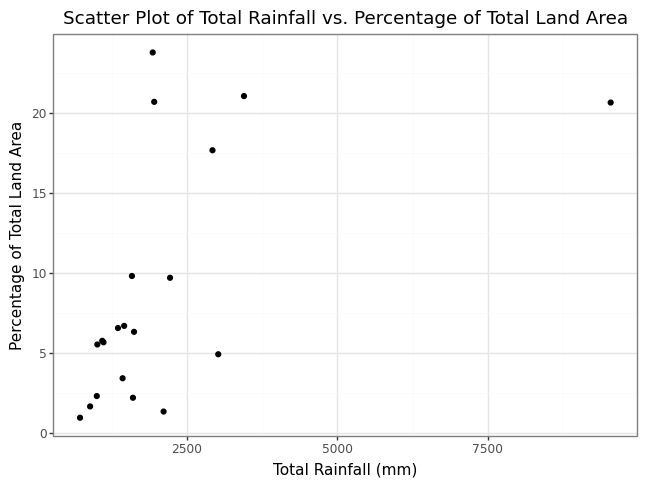

In [31]:
# Import necessary libraries
from plotnine import *
import pandas as pd

# Load the dataset
df = pd.read_csv("final_rain.csv")

# Sum over all the months and stations for each state
df['Total_Rainfall_All_Months_All_Stations'] = df.iloc[:, 3:].sum(axis=1)

# Group by state and sum over all stations
statewise_mean_rainfall = df.groupby('State')['Total_Rainfall_All_Months_All_Stations'].mean().reset_index()

# Load the shapefile of Indian states
india_states = gpd.read_file("Indian_States.shp")

# Assuming india_states is the name of your DataFrame
india_states['st_nm'] = india_states['st_nm'].replace('Arunanchal Pradesh', 'Arunachal Pradesh')
# Reproject geometries to a projected CRS suitable for area calculations
india_states = india_states.to_crs("EPSG:3395")  # World Mercator projection

# Calculate the area of each state
india_states['Area_sq_km'] = india_states['geometry'].area / 10**6  # Convert area to square kilometers

# Load the forest cover data
data = pd.read_excel("Forest_2019-20.xlsx")

# Exclude the first row (which represents all over India)
data = data.iloc[1:]

# Melt the data to convert forest cover categories into a single column
melted_data = pd.melt(data, id_vars=['State', 'Total Area in Sq.km'],
                      value_vars=['VDF (in %)', 'OF (in %)', 'MDF (in %)'],
                      var_name='Forest Cover Category', value_name='Percentage')

# Calculate the Percentage of Total Land Area by multiplying percentage with the total area
melted_data['Percentage of Total Land Area'] = melted_data['Percentage'] * melted_data['Total Area in Sq.km'] / 100

# Merge forest cover data with shapefile
merged_data = india_states.merge(melted_data, how='left', left_on='st_nm', right_on='State')

# Calculate the percentage of forest area compared to the total land area for each state
merged_data['Percentage of Total Land Area'] = (merged_data['Percentage of Total Land Area'] / merged_data['Area_sq_km']) * 100

#Group by state and sum over all stations
total_forest_area_percentage = merged_data.groupby('State')['Percentage of Total Land Area'].mean().reset_index()

# Merge DataFrames on State
merged_df = pd.merge(statewise_mean_rainfall, total_forest_area_percentage, on='State')

# Calculate correlation
correlation = merged_df['Total_Rainfall_All_Months_All_Stations'].corr(merged_df['Percentage of Total Land Area'])

# Plot using plotnine
plot = (
    ggplot(merged_df, aes(x='Total_Rainfall_All_Months_All_Stations', y='Percentage of Total Land Area')) +
    geom_point() +
    theme_bw() +
    ggtitle('Scatter Plot of Total Rainfall vs. Percentage of Total Land Area') +
    xlab('Total Rainfall (mm)') +
    ylab('Percentage of Total Land Area')
)

print("Correlation between Total Rainfall and Percentage of Total Land Area:", correlation)
plot.draw()

#### Observations ▶

* The correlation is around 0.55 which could be due to Transpiration (a process in which trees and vegetation absorb water through their roots and cool surroundings by releasing water vapor into the air through their leaves).

* Meghalaya is an outlier, because of high Hilly areas.


# Thank You
##              The Earth is what we all have in common
###                                      — Wendell Berry